In [1]:
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns

In [2]:
#train_d=pd.read_csv("C:/Users/RAJKUMAR/Downloads/data/train_data.csv")
#train_d=pd.read_csv("train_data.csv")
#from sklearn.model_selection import train_test_split
#development_data, validation_data = train_test_split(train_d, test_size=0.15, random_state=25, stratify=train_d['Stay'])
validation_data=pd.read_csv("C:/Users/RAJKUMAR/Downloads/Validation_data.csv")
#validation_data=pd.read_csv("Validation_data.csv")
#development_data=pd.read_csv("Development_data.csv")
development_data=pd.read_csv("C:/Users/RAJKUMAR/Downloads/Development_data.csv")

In [3]:
development_data=development_data.drop(['Unnamed: 0'], axis=1)
validation_data=validation_data.drop(['Unnamed: 0'], axis=1)
development_data=development_data.dropna()
validation_data=validation_data.dropna()

development_data.columns

Index(['case_id', 'Hospital_code', 'Hospital_type_code', 'City_Code_Hospital',
       'Hospital_region_code', 'Available Extra Rooms in Hospital',
       'Department', 'Ward_Type', 'Ward_Facility_Code', 'Bed Grade',
       'patientid', 'City_Code_Patient', 'Type of Admission',
       'Severity of Illness', 'Visitors with Patient', 'Age',
       'Admission_Deposit', 'Stay'],
      dtype='object')

In [4]:
nominal_features = ['Ward_Type','Type of Admission']
def one_hot_encode(dataset,features):
    nominal_df = dataset[features]

    # convert into dummies
    nominal_dummies = pd.get_dummies(nominal_df, drop_first=False)
    # drop categorical variables 
    dataset = dataset.drop(list(nominal_df.columns), axis=1)
    # concat dummy variables with X
    dataset = pd.concat([dataset, nominal_dummies], axis=1)
    return dataset

validation_data = one_hot_encode(validation_data,nominal_features)
development_data = one_hot_encode(development_data,nominal_features)


In [5]:
map_age={'0-10':0, '11-20':1, '21-30':2, '31-40':3, '41-50':4, '51-60':5, '61-70':6, '71-80':7, '81-90':8, '91-100':9}
validation_data["Age"]=validation_data["Age"].map(map_age)
validation_data["Age"].value_counts()
development_data["Age"]=development_data["Age"].map(map_age)
development_data["Age"].value_counts()

3    53286
4    53179
5    40563
2    34319
7    30078
6    28363
1    14029
8     6593
0     5261
9     1050
Name: Age, dtype: int64

In [6]:
map_illness={"Minor":0, "Moderate":1, "Extreme":2}
validation_data["Severity of Illness"]=validation_data["Severity of Illness"].map(map_illness)
validation_data["Severity of Illness"].value_counts()
development_data["Severity of Illness"]=development_data["Severity of Illness"].map(map_illness)
development_data["Severity of Illness"].value_counts()

1    147543
0     71495
2     47683
Name: Severity of Illness, dtype: int64

In [7]:
validation_data["visitors2"]=np.where((validation_data["Visitors with Patient"]==2),1,0)
development_data["visitors2"]=np.where((development_data["Visitors with Patient"]==2),1,0)

In [8]:
development_data

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Facility_Code,Bed Grade,patientid,...,Ward_Type_P,Ward_Type_Q,Ward_Type_R,Ward_Type_S,Ward_Type_T,Ward_Type_U,Type of Admission_Emergency,Type of Admission_Trauma,Type of Admission_Urgent,visitors2
0,159422,13,a,5,Z,2,anesthesia,F,4.0,64466,...,0,0,1,0,0,0,0,1,0,1
1,286721,26,b,2,Y,3,gynecology,D,2.0,19110,...,0,0,1,0,0,0,1,0,0,0
2,305382,29,a,4,X,2,gynecology,F,4.0,101531,...,0,0,0,1,0,0,0,0,1,1
3,90072,6,a,6,X,3,TB & Chest disease,F,2.0,85470,...,0,0,1,0,0,0,1,0,0,1
4,232866,21,c,3,Z,3,gynecology,A,2.0,45229,...,0,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266716,50829,11,b,2,Y,2,anesthesia,D,4.0,97610,...,0,1,0,0,0,0,1,0,0,0
266717,151915,32,f,9,Y,1,gynecology,B,1.0,129120,...,0,0,0,1,0,0,0,1,0,0
266718,261401,26,b,2,Y,4,gynecology,D,3.0,85261,...,0,1,0,0,0,0,1,0,0,0
266719,114834,24,a,1,X,4,gynecology,E,2.0,44445,...,0,0,1,0,0,0,0,0,1,1


In [9]:
validation_data=validation_data.loc[:,['case_id','Hospital_code', 'Available Extra Rooms in Hospital', 'Bed Grade','City_Code_Patient', 'Severity of Illness', 'Visitors with Patient','Age', 'Admission_Deposit', 'Ward_Type_Q', 'Ward_Type_R', 'Ward_Type_S','Type of Admission_Emergency', 'Type of Admission_Trauma', 'visitors2','Stay']]
development_data=development_data.loc[:,['case_id','Hospital_code', 'Available Extra Rooms in Hospital', 'Bed Grade','City_Code_Patient', 'Severity of Illness', 'Visitors with Patient','Age', 'Admission_Deposit', 'Ward_Type_Q', 'Ward_Type_R', 'Ward_Type_S','Type of Admission_Emergency', 'Type of Admission_Trauma', 'visitors2','Stay']]

In [10]:
#train_woe=pd.read_csv("C:/Users/RAJKUMAR/Downloads/train_woe.csv")
train_woe=pd.read_csv("train_woe.csv")
#test_woe=pd.read_csv("C:/Users/RAJKUMAR/Downloads/test_woe.csv")
test_woe=pd.read_csv("test_woe.csv")
train_woe=train_woe.drop(['Unnamed: 0'], axis=1)
test_woe=test_woe.drop(['Unnamed: 0'], axis=1)

In [11]:
train_woe

,case_id,City_Code_Hospital_woe,Type of Admission_woe,Admission_Deposit_woe,Hospital_code_woe,Visitors with Patient_woe
0,159422,0.040785,-0.789857,-0.189810,0.245281,0.342908
1,286721,0.040785,0.542264,0.014172,-0.109661,0.243259
2,305382,0.040785,0.130322,-0.189810,0.135230,0.342908
3,90072,-0.368281,0.542264,0.320399,-0.039360,0.342908
4,232866,0.040785,0.542264,0.014172,-0.395267,0.243259
...,...,...,...,...,...,...
266716,50829,0.040785,0.542264,-0.189810,0.245281,-0.467943
266717,151915,0.059794,-0.789857,0.320399,0.135230,-0.467943
266718,261401,0.040785,0.542264,-0.189810,-0.109661,-0.467943
266719,114834,-0.176034,0.130322,0.320399,-0.109661,0.342908


In [12]:
development_data


,case_id,Hospital_code,Available Extra Rooms in Hospital,Bed Grade,City_Code_Patient,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Ward_Type_Q,Ward_Type_R,Ward_Type_S,Type of Admission_Emergency,Type of Admission_Trauma,visitors2,Stay
0,159422,13,2,4.0,8.0,1,2,7,5130.0,0,1,0,0,1,1,0
1,286721,26,3,2.0,15.0,1,3,4,4679.0,0,1,0,1,0,0,0
2,305382,29,2,4.0,2.0,2,2,4,5843.0,0,0,1,0,0,1,0
3,90072,6,3,2.0,1.0,2,2,4,3645.0,0,1,0,1,0,1,0
4,232866,21,3,2.0,8.0,1,3,5,4524.0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266716,50829,11,2,4.0,8.0,2,4,5,5427.0,1,0,0,1,0,0,0
266717,151915,32,1,1.0,7.0,2,4,8,3991.0,0,0,1,0,1,0,0
266718,261401,26,4,3.0,7.0,0,4,2,5295.0,1,0,0,1,0,0,1
266719,114834,24,4,2.0,1.0,2,2,4,3999.0,0,1,0,0,0,1,0


In [13]:
development_final = pd.merge(development_data, train_woe, on='case_id', how='left')
validation_final = pd.merge(validation_data, test_woe, on='case_id', how='left')

In [14]:

validation_final.to_csv('validation_final.csv')
validation_final

,case_id,Hospital_code,Available Extra Rooms in Hospital,Bed Grade,City_Code_Patient,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Ward_Type_Q,...,Ward_Type_S,Type of Admission_Emergency,Type of Admission_Trauma,visitors2,Stay,City_Code_Hospital_woe,Type of Admission_woe,Admission_Deposit_woe,Hospital_code_woe,Visitors with Patient_woe
0,106459,26,4,2.0,5.0,1,2,2,4868.0,1,...,0,0,1,1,0,0.040785,-0.789857,-0.189810,-0.109661,0.342908
1,163670,11,1,4.0,8.0,1,4,3,3980.0,1,...,0,0,0,0,0,0.040785,0.130322,0.320399,0.245281,-0.467943
2,128988,19,5,2.0,8.0,1,4,2,4206.0,1,...,0,1,0,0,0,0.439249,0.542264,0.014172,0.409404,-0.467943
3,293914,19,3,1.0,8.0,1,2,2,3880.0,1,...,0,1,0,1,0,0.439249,0.542264,0.320399,0.409404,0.342908
4,149563,1,2,4.0,5.0,0,2,8,6085.0,0,...,0,0,1,1,0,-0.082893,-0.789857,-0.189810,-0.039360,0.342908
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47067,9404,25,2,4.0,8.0,0,2,6,5622.0,0,...,1,1,0,1,0,-0.176034,0.542264,-0.189810,-0.109661,0.342908
47068,238346,12,3,2.0,4.0,1,2,4,6777.0,1,...,0,1,0,1,0,0.059794,0.542264,-0.448234,0.245281,0.342908
47069,196804,29,5,2.0,8.0,1,6,1,4466.0,0,...,0,1,0,0,0,0.040785,0.542264,0.014172,0.135230,-3.027568
47070,98100,30,2,4.0,8.0,1,6,3,4966.0,0,...,0,0,1,0,0,0.040785,-0.789857,-0.189810,0.135230,-3.027568


In [15]:
X_test=validation_final.drop(["case_id","Stay"], axis=1)
y_test=validation_final["Stay"]
X_train=development_final.drop(["case_id","Stay"], axis=1)
y_train=development_final["Stay"]

In [16]:
development_data.isna().sum()

case_id                              0
Hospital_code                        0
Available Extra Rooms in Hospital    0
Bed Grade                            0
City_Code_Patient                    0
Severity of Illness                  0
Visitors with Patient                0
Age                                  0
Admission_Deposit                    0
Ward_Type_Q                          0
Ward_Type_R                          0
Ward_Type_S                          0
Type of Admission_Emergency          0
Type of Admission_Trauma             0
visitors2                            0
Stay                                 0
dtype: int64

In [17]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(266721, 19)
(266721,)
(47072, 19)
(47072,)


## Logistic Regression

In [18]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

========================== Logistic Regression - Model Report =========================
===================== Model Accuracy ==============================
Train Accuracy: 0.663
Test Accuracy: 0.663
===================== Cross Validation Scores ===========================
Fold - 1
CV Score = 0.747
Fold - 2
CV Score = 0.752
Fold - 3
CV Score = 0.746
Fold - 4
CV Score = 0.745
Fold - 5
CV Score = 0.745
Average 5-Fold CV Score: 0.747
===================== Model Performance Metrices ===========================
Test Confusion Matrix: 
[[28677 14905]
 [  959  2531]]
Train Confusion Matrix: 
[[162562  84399]
 [  5536  14224]]
Test Classification Report: 
              precision    recall  f1-score   support

           0       0.97      0.66      0.78     43582
           1       0.15      0.73      0.24      3490

    accuracy                           0.66     47072
   macro avg       0.56      0.69      0.51     47072
weighted avg       0.91      0.66      0.74     47072

Train Classificati

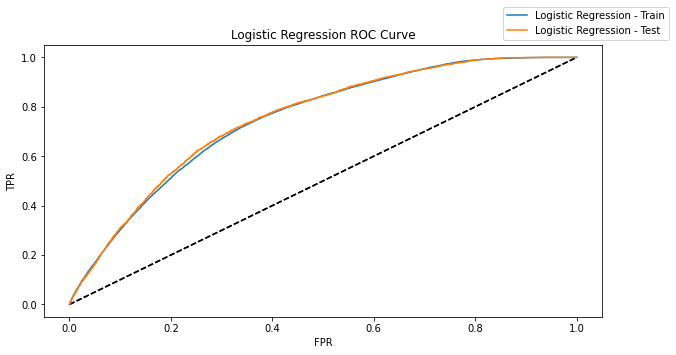

In [19]:
lr = LogisticRegression(class_weight='balanced')

lr.fit(X_train, y_train)

y_test_pred = lr.predict(X_test)
y_train_pred = lr.predict(X_train)

print("========================== Logistic Regression - Model Report =========================")

print("===================== Model Accuracy ==============================")
print("Train Accuracy: %0.3f"%(lr.score(X_train, y_train)))
print("Test Accuracy: %0.3f"%(lr.score(X_test, y_test)))
print("=====================================================")
# Cross validation
from sklearn.model_selection import cross_val_score

print("===================== Cross Validation Scores ===========================")
cv_results_lr = cross_val_score(lr, X_train, y_train, cv=5, scoring='roc_auc')
for i in range(len(cv_results_lr)):
    print("Fold - {}".format(i+1))
    print("CV Score = %0.3f"%cv_results_lr[i])
print("Average 5-Fold CV Score: %0.3f"%(np.mean(cv_results_lr)))
print("=====================================================")

# Performance Metrices
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score

print("===================== Model Performance Metrices ===========================")
print("Test Confusion Matrix: ")
print(confusion_matrix(y_test, y_test_pred))
print("============================")
print("Train Confusion Matrix: ")
print(confusion_matrix(y_train, y_train_pred))

print("=====================================================")
print("Test Classification Report: ")
print(classification_report(y_test, y_test_pred))
print("=====================================================")
print("Train Classification Report: ")
print(classification_report(y_train, y_train_pred))

y_test_pred_prob = lr.predict_proba(X_test)[:,1]
y_train_pred_prob = lr.predict_proba(X_train)[:,1]

print("===================== Model AUC Scores ===========================")
print("Train AUC Score: %0.3f"%(roc_auc_score(y_train, y_train_pred_prob)))
print("Test AUC Score: %0.3f"%(roc_auc_score(y_test, y_test_pred_prob)))
print("=====================================================")

print("===================== Model AUC Curve ===========================")
fpr, tpr, threshold = roc_curve(y_test, y_test_pred_prob)
fpr1, tpr1, threshold1 = roc_curve(y_train, y_train_pred_prob)

plt.figure(figsize=(10,5))
plt.title('Logistic Regression ROC Curve')
plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr1, tpr1, label='Logistic Regression - Train')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(bbox_to_anchor=(1, 1), bbox_transform=plt.gcf().transFigure)

plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr, label='Logistic Regression - Test')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(bbox_to_anchor=(1, 1), bbox_transform=plt.gcf().transFigure)
plt.show()

## Bias-Variance Tradeoff (Logistic Regression)

In [20]:
# C
train_score = []
test_score = []
vals = []

# To check the bias-variance take any parameters and iterate over a few values - Like n_estimator, Max_depth
for k in np.arange(0.05, 1, 0.05):
    vals.append(k)
    log_bv = LogisticRegression(class_weight='balanced', C=k)
    log_bv.fit(X_train, y_train)
    
    tr_score = roc_auc_score(y_train, log_bv.predict_proba(X_train)[:,1])
    train_score.append(tr_score)
    
    te_score = roc_auc_score(y_test, log_bv.predict_proba(X_test)[:,1])
    test_score.append(te_score)

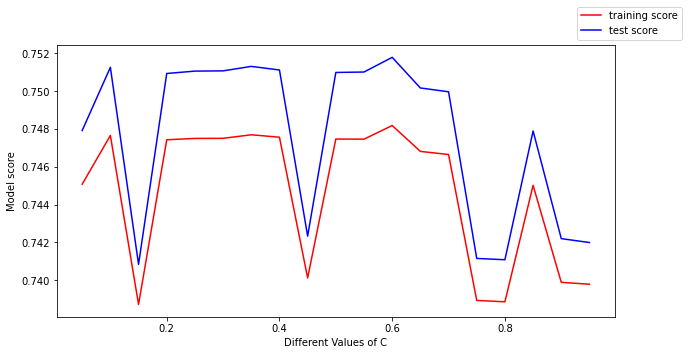

In [21]:
# n_estimators
plt.figure(figsize=(10,5))
plt.xlabel('Different Values of C')
plt.ylabel('Model score')
plt.plot(vals, train_score, color = 'r', label = "training score")
plt.plot(vals, test_score, color = 'b', label = 'test score')
plt.legend(bbox_to_anchor=(1, 1),
           bbox_transform=plt.gcf().transFigure)
plt.show()

## Logistic Regression hyperparameter tuning

In [22]:
params_lr = {'C': [0.1,0.2,0.3,0.4,0.6],
               'penalty':['l1', 'l2', 'elasticnet'],
               'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

In [23]:
from sklearn.model_selection import RandomizedSearchCV
rand_lr = RandomizedSearchCV(estimator  = lr,
                         param_distributions = params_lr,
                         scoring    = 'roc_auc',
                         cv         = 3,
                         n_jobs     = -1,
                         verbose    = True
                        )

In [24]:
rand_lr.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=LogisticRegression(class_weight='balanced'),
                   n_jobs=-1,
                   param_distributions={'C': [0.1, 0.2, 0.3, 0.4, 0.6],
                                        'penalty': ['l1', 'l2', 'elasticnet'],
                                        'solver': ['newton-cg', 'lbfgs',
                                                   'liblinear', 'sag',
                                                   'saga']},
                   scoring='roc_auc', verbose=True)

In [25]:
print("Best Hyperparameters: \n", rand_lr.best_params_)
print("Best AUC Score: \n", rand_lr.best_score_)

Best Hyperparameters: 
 {'solver': 'liblinear', 'penalty': 'l2', 'C': 0.1}
Best AUC Score: 
 0.7659543618325578


In [26]:
# Save the best combination of parameters as best model
best_model_lr = rand_lr.best_estimator_

========================== Logistic Regression Tuned - Model Report =========================
===================== Model Accuracy ==============================
Train Accuracy: 0.674
Test Accuracy: 0.676
===================== Model Performance Metrices ===========================
Test Confusion Matrix: 
[[29241 14341]
 [  912  2578]]
Train Confusion Matrix: 
[[165465  81496]
 [  5337  14423]]
Test Classification Report: 
              precision    recall  f1-score   support

           0       0.97      0.67      0.79     43582
           1       0.15      0.74      0.25      3490

    accuracy                           0.68     47072
   macro avg       0.56      0.70      0.52     47072
weighted avg       0.91      0.68      0.75     47072

Train Classification Report: 
              precision    recall  f1-score   support

           0       0.97      0.67      0.79    246961
           1       0.15      0.73      0.25     19760

    accuracy                           0.67    266721

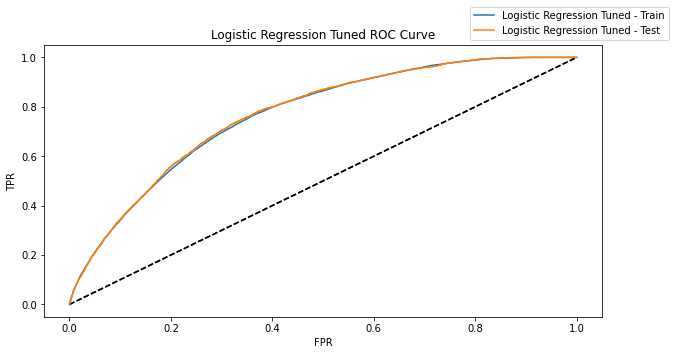

In [27]:
y_test_pred = best_model_lr.predict(X_test)
y_train_pred = best_model_lr.predict(X_train)


print("========================== Logistic Regression Tuned - Model Report =========================")

print("===================== Model Accuracy ==============================")
print("Train Accuracy: %0.3f"%(best_model_lr.score(X_train, y_train)))
print("Test Accuracy: %0.3f"%(best_model_lr.score(X_test, y_test)))
print("=====================================================")

# Performance Metrices
# from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score

print("===================== Model Performance Metrices ===========================")
print("Test Confusion Matrix: ")
print(confusion_matrix(y_test, y_test_pred))
print("============================")
print("Train Confusion Matrix: ")
print(confusion_matrix(y_train, y_train_pred))

print("=====================================================")
print("Test Classification Report: ")
print(classification_report(y_test, y_test_pred))
print("=====================================================")
print("Train Classification Report: ")
print(classification_report(y_train, y_train_pred))

y_test_pred_prob = best_model_lr.predict_proba(X_test)[:,1]
y_train_pred_prob = best_model_lr.predict_proba(X_train)[:,1]

print("===================== Model AUC Scores ===========================")
print("Train AUC Score: %0.3f"%(roc_auc_score(y_train, y_train_pred_prob)))
print("Test AUC Score: %0.3f"%(roc_auc_score(y_test, y_test_pred_prob)))
print("=====================================================")

print("===================== Model AUC Curve ===========================")
fpr, tpr, threshold = roc_curve(y_test, y_test_pred_prob)
fpr1, tpr1, threshold1 = roc_curve(y_train, y_train_pred_prob)

plt.figure(figsize=(10,5))
plt.title('Logistic Regression Tuned ROC Curve')
plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr1, tpr1, label='Logistic Regression Tuned - Train')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(bbox_to_anchor=(1, 1), bbox_transform=plt.gcf().transFigure)

plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr, label='Logistic Regression Tuned - Test')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(bbox_to_anchor=(1, 1), bbox_transform=plt.gcf().transFigure)
plt.show()

# Random Forest

In [28]:
from sklearn.ensemble import RandomForestClassifier

========================== Random Forest - Model Report =========================
===================== Model Accuracy ==============================
Train Accuracy: 1.000
Test Accuracy: 0.923
===================== Cross Validation Scores ===========================
Fold - 1
CV Score = 0.784
Fold - 2
CV Score = 0.783
Fold - 3
CV Score = 0.776
Fold - 4
CV Score = 0.774
Fold - 5
CV Score = 0.781
Average 5-Fold CV Score: 0.779
===================== Model Performance Metrices ===========================
Test Confusion Matrix: 
[[43250   332]
 [ 3296   194]]
Train Confusion Matrix: 
[[246927     34]
 [    11  19749]]
Test Classification Report: 
              precision    recall  f1-score   support

           0       0.93      0.99      0.96     43582
           1       0.37      0.06      0.10      3490

    accuracy                           0.92     47072
   macro avg       0.65      0.52      0.53     47072
weighted avg       0.89      0.92      0.90     47072

Train Classification Rep

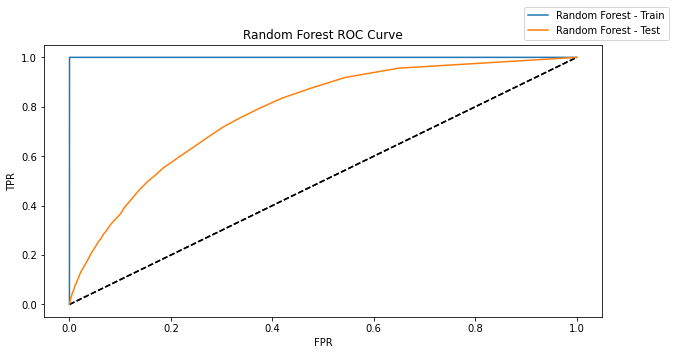

In [29]:
rf = RandomForestClassifier(class_weight='balanced')

rf.fit(X_train, y_train)

y_test_pred = rf.predict(X_test)
y_train_pred = rf.predict(X_train)

print("========================== Random Forest - Model Report =========================")

print("===================== Model Accuracy ==============================")
print("Train Accuracy: %0.3f"%(rf.score(X_train, y_train)))
print("Test Accuracy: %0.3f"%(rf.score(X_test, y_test)))
print("=====================================================")

# Cross validation
# from sklearn.model_selection import cross_val_score

print("===================== Cross Validation Scores ===========================")
cv_results_rf = cross_val_score(rf, X_train, y_train, cv=5, scoring='roc_auc')
for i in range(len(cv_results_rf)):
    print("Fold - {}".format(i+1))
    print("CV Score = %0.3f"%cv_results_rf[i])
print("Average 5-Fold CV Score: %0.3f"%(np.mean(cv_results_rf)))
print("=====================================================")

# Performance Metrices
# from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score

print("===================== Model Performance Metrices ===========================")
print("Test Confusion Matrix: ")
print(confusion_matrix(y_test, y_test_pred))
print("============================")
print("Train Confusion Matrix: ")
print(confusion_matrix(y_train, y_train_pred))

print("=====================================================")
print("Test Classification Report: ")
print(classification_report(y_test, y_test_pred))
print("=====================================================")
print("Train Classification Report: ")
print(classification_report(y_train, y_train_pred))

y_test_pred_prob = rf.predict_proba(X_test)[:,1]
y_train_pred_prob = rf.predict_proba(X_train)[:,1]

print("===================== Model AUC Scores ===========================")
print("Train AUC Score: %0.3f"%(roc_auc_score(y_train, y_train_pred_prob)))
print("Test AUC Score: %0.3f"%(roc_auc_score(y_test, y_test_pred_prob)))
print("=====================================================")

print("===================== Model AUC Curve ===========================")
fpr, tpr, threshold = roc_curve(y_test, y_test_pred_prob)
fpr1, tpr1, threshold1 = roc_curve(y_train, y_train_pred_prob)

plt.figure(figsize=(10,5))
plt.title('Random Forest ROC Curve')
plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr1, tpr1, label='Random Forest - Train')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(bbox_to_anchor=(1, 1), bbox_transform=plt.gcf().transFigure)

plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr, label='Random Forest - Test')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(bbox_to_anchor=(1, 1), bbox_transform=plt.gcf().transFigure)
plt.show()

## Bias-Variance Tradeoff (Random Forest)

In [30]:
train_score = []
test_score = []
vals = []

# To check the bias-variance take any parameters and iterate over a few values - Like n_estimator, Max_depth
for k in np.arange(50, 200, 50):
    vals.append(k)
    rf_bv = RandomForestClassifier(n_estimators=k, class_weight='balanced', max_depth = 4)
    rf_bv.fit(X_train, y_train)
    
    tr_score = roc_auc_score(y_train, rf_bv.predict_proba(X_train)[:,1])
    train_score.append(tr_score)
    
    te_score = roc_auc_score(y_test, rf_bv.predict_proba(X_test)[:,1])
    test_score.append(te_score)

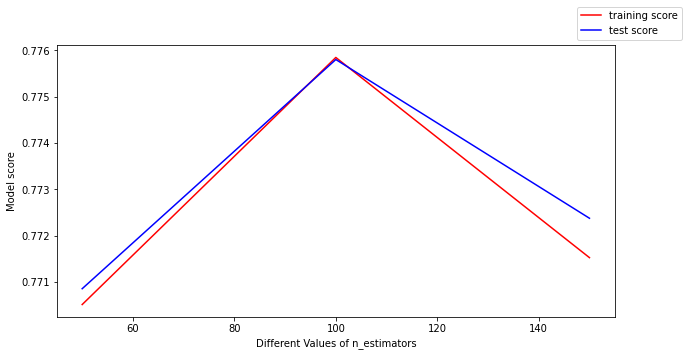

In [31]:
# n_estimators
plt.figure(figsize=(10,5))
plt.xlabel('Different Values of n_estimators')
plt.ylabel('Model score')
plt.plot(vals, train_score, color = 'r', label = "training score")
plt.plot(vals, test_score, color = 'b', label = 'test score')
plt.legend(bbox_to_anchor=(1, 1),
           bbox_transform=plt.gcf().transFigure)
plt.show()

In [32]:
# max_depth
train_score = []
test_score = []
vals = []

# To check the bias-variance take any parameters and iterate over a few values - Like n_estimator, Max_depth
for k in np.arange(1, 10, 1):
    vals.append(k)
    rf_bv = RandomForestClassifier(n_estimators=100, class_weight='balanced', max_depth = k)
    rf_bv.fit(X_train, y_train)
    
    tr_score = roc_auc_score(y_train, rf_bv.predict_proba(X_train)[:,1])
    train_score.append(tr_score)
    
    te_score = roc_auc_score(y_test, rf_bv.predict_proba(X_test)[:,1])
    test_score.append(te_score)

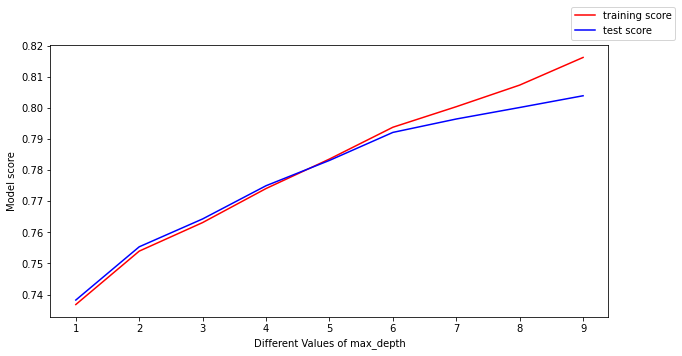

In [33]:
plt.figure(figsize=(10,5))
plt.xlabel('Different Values of max_depth')
plt.ylabel('Model score')
plt.plot(vals, train_score, color = 'r', label = "training score")
plt.plot(vals, test_score, color = 'b', label = 'test score')
plt.legend(bbox_to_anchor=(1, 1),
           bbox_transform=plt.gcf().transFigure)
plt.show()

In [34]:
# min_samples_split
train_score = []
test_score = []
vals = []

# To check the bias-variance take any parameters and iterate over a few values - Like n_estimator, Max_depth
for k in np.arange(2, 16, 2):
    vals.append(k)
    rf_bv = RandomForestClassifier(n_estimators=100, class_weight='balanced', max_depth = 6, min_samples_split=k)
    rf_bv.fit(X_train, y_train)
    
    tr_score = roc_auc_score(y_train, rf_bv.predict_proba(X_train)[:,1])
    train_score.append(tr_score)
    
    te_score = roc_auc_score(y_test, rf_bv.predict_proba(X_test)[:,1])
    test_score.append(te_score)

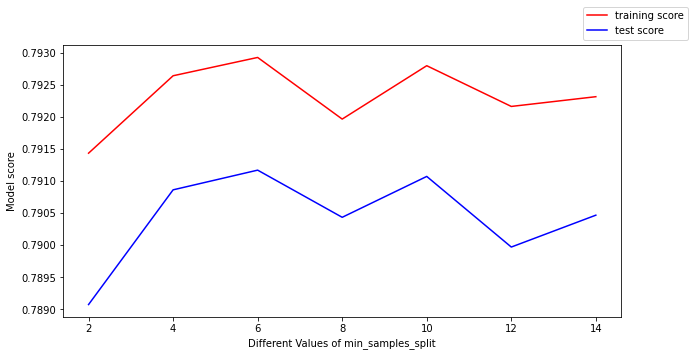

In [35]:
plt.figure(figsize=(10,5))
plt.xlabel('Different Values of min_samples_split')
plt.ylabel('Model score')
plt.plot(vals, train_score, color = 'r', label = "training score")
plt.plot(vals, test_score, color = 'b', label = 'test score')
plt.legend(bbox_to_anchor=(1, 1),
           bbox_transform=plt.gcf().transFigure)
plt.show()

In [36]:
# max_leaf_nodes
train_score = []
test_score = []
vals = []

# To check the bias-variance take any parameters and iterate over a few values - Like n_estimator, Max_depth
for k in np.arange(2, 10, 1):
    vals.append(k)
    rf_bv = RandomForestClassifier(n_estimators=100, class_weight='balanced', max_depth = 7, min_samples_split=4, max_leaf_nodes=k)
    rf_bv.fit(X_train, y_train)
    
    tr_score = roc_auc_score(y_train, rf_bv.predict_proba(X_train)[:,1])
    train_score.append(tr_score)
    
    te_score = roc_auc_score(y_test, rf_bv.predict_proba(X_test)[:,1])
    test_score.append(te_score)

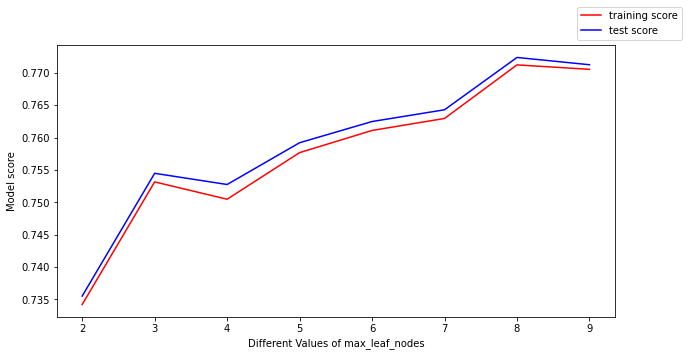

In [37]:
plt.figure(figsize=(10,5))
plt.xlabel('Different Values of max_leaf_nodes')
plt.ylabel('Model score')
plt.plot(vals, train_score, color = 'r', label = "training score")
plt.plot(vals, test_score, color = 'b', label = 'test score')
plt.legend(bbox_to_anchor=(1, 1),
           bbox_transform=plt.gcf().transFigure)
plt.show()

## Random Forest hyperparameter tuning

In [39]:
params_rf = #1{'max_depth': [4,5,6,8,10],
               'min_samples_split':[4,6,8,10],
               'n_estimators':[80,90,100,110, 120],
             'max_leaf_nodes' : [5,6,7,8,10]
              }

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 4)

In [ ]:
rand_rf = RandomizedSearchCV(estimator  = rf,
                         param_distributions = params_rf,
                         scoring    = 'roc_auc',
                         cv         = 3,
                         n_jobs     = -1,
                         verbose    = True
                        )

In [ ]:
rand_rf.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3,
                   estimator=RandomForestClassifier(class_weight='balanced'),
                   n_jobs=-1,
                   param_distributions={'max_depth': [4, 5, 6, 8, 10],
                                        'max_leaf_nodes': [5, 6, 7, 8, 10],
                                        'min_samples_split': [4, 6, 8, 10],
                                        'n_estimators': [80, 90, 100, 110,
                                                         120]},
                   scoring='roc_auc', verbose=True)

In [ ]:
print("Best Hyperparameters: \n", rand_rf.best_params_)
print("Best AUC Score: \n", rand_rf.best_score_)

Best Hyperparameters: 
 {'n_estimators': 100, 'min_samples_split': 8, 'max_leaf_nodes': 10, 'max_depth': 6}
Best AUC Score: 
 0.7730803680420572


In [ ]:
# Save the best combination of parameters as best model
best_model_rf = rand_rf.best_estimator_

========================== Random Forest Tuned - Model Report =========================
===================== Model Accuracy ==============================
Train Accuracy: 0.641
Test Accuracy: 0.642
===================== Model Performance Metrices ===========================
Test Confusion Matrix: 
[[27499 16083]
 [  748  2742]]
Train Confusion Matrix: 
[[155603  91358]
 [  4314  15446]]
Test Classification Report: 
              precision    recall  f1-score   support

           0       0.97      0.63      0.77     43582
           1       0.15      0.79      0.25      3490

    accuracy                           0.64     47072
   macro avg       0.56      0.71      0.51     47072
weighted avg       0.91      0.64      0.73     47072

Train Classification Report: 
              precision    recall  f1-score   support

           0       0.97      0.63      0.76    246961
           1       0.14      0.78      0.24     19760

    accuracy                           0.64    266721
   ma

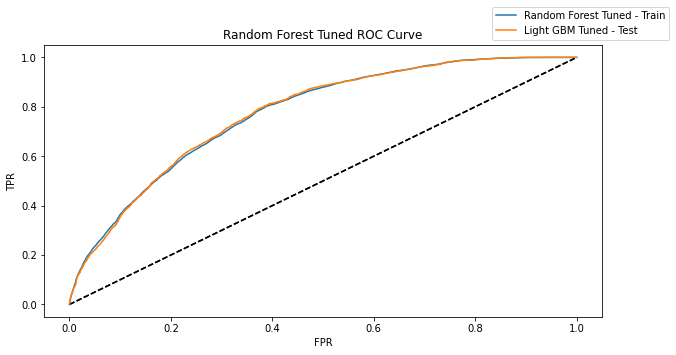

In [ ]:
y_test_pred = best_model_rf.predict(X_test)
y_train_pred = best_model_rf.predict(X_train)


print("========================== Random Forest Tuned - Model Report =========================")

print("===================== Model Accuracy ==============================")
print("Train Accuracy: %0.3f"%(best_model_rf.score(X_train, y_train)))
print("Test Accuracy: %0.3f"%(best_model_rf.score(X_test, y_test)))
print("=====================================================")

# Performance Metrices
# from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score

print("===================== Model Performance Metrices ===========================")
print("Test Confusion Matrix: ")
print(confusion_matrix(y_test, y_test_pred))
print("============================")
print("Train Confusion Matrix: ")
print(confusion_matrix(y_train, y_train_pred))

print("=====================================================")
print("Test Classification Report: ")
print(classification_report(y_test, y_test_pred))
print("=====================================================")
print("Train Classification Report: ")
print(classification_report(y_train, y_train_pred))

y_test_pred_prob = best_model_rf.predict_proba(X_test)[:,1]
y_train_pred_prob = best_model_rf.predict_proba(X_train)[:,1]

print("===================== Model AUC Scores ===========================")
print("Train AUC Score: %0.3f"%(roc_auc_score(y_train, y_train_pred_prob)))
print("Test AUC Score: %0.3f"%(roc_auc_score(y_test, y_test_pred_prob)))
print("=====================================================")

print("===================== Model AUC Curve ===========================")
fpr, tpr, threshold = roc_curve(y_test, y_test_pred_prob)
fpr1, tpr1, threshold1 = roc_curve(y_train, y_train_pred_prob)

plt.figure(figsize=(10,5))
plt.title('Random Forest Tuned ROC Curve')
plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr1, tpr1, label='Random Forest Tuned - Train')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(bbox_to_anchor=(1, 1), bbox_transform=plt.gcf().transFigure)

plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr, label='Light GBM Tuned - Test')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(bbox_to_anchor=(1, 1), bbox_transform=plt.gcf().transFigure)
plt.show()

# Light GBM

In [ ]:
#!pip install lightgbm

In [ ]:
from lightgbm import LGBMClassifier

========================== Light GBM - Model Report =========================
===================== Model Accuracy ==============================
Train Accuracy: 0.700
Test Accuracy: 0.698
===================== Cross Validation Scores ===========================
Fold - 1
CV Score = 0.824
Fold - 2
CV Score = 0.823
Fold - 3
CV Score = 0.820
Fold - 4
CV Score = 0.819
Fold - 5
CV Score = 0.820
Average 5-Fold CV Score: 0.821
===================== Model Performance Metrices ===========================
Test Confusion Matrix: 
[[30071 13511]
 [  728  2762]]
Train Confusion Matrix: 
[[170668  76293]
 [  3682  16078]]
Test Classification Report: 
              precision    recall  f1-score   support

           0       0.98      0.69      0.81     43582
           1       0.17      0.79      0.28      3490

    accuracy                           0.70     47072
   macro avg       0.57      0.74      0.54     47072
weighted avg       0.92      0.70      0.77     47072

Train Classification Report:

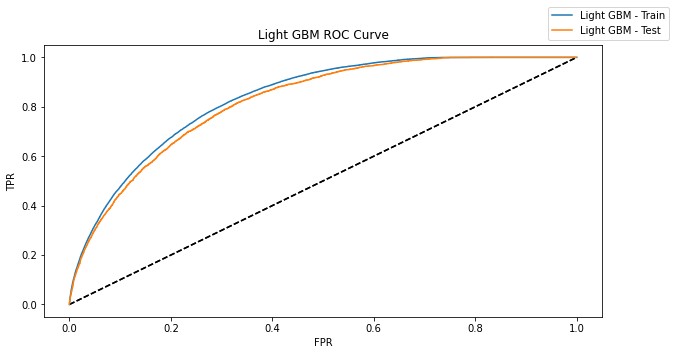

In [ ]:
lgbm = LGBMClassifier(class_weight='balanced')

lgbm.fit(X_train, y_train)

y_test_pred = lgbm.predict(X_test)
y_train_pred = lgbm.predict(X_train)

print("========================== Light GBM - Model Report =========================")

print("===================== Model Accuracy ==============================")
print("Train Accuracy: %0.3f"%(lgbm.score(X_train, y_train)))
print("Test Accuracy: %0.3f"%(lgbm.score(X_test, y_test)))
print("=====================================================")

# Cross validation
# from sklearn.model_selection import cross_val_score

print("===================== Cross Validation Scores ===========================")
cv_results_lgbm = cross_val_score(lgbm, X_train, y_train, cv=5, scoring='roc_auc')
for i in range(len(cv_results_lgbm)):
    print("Fold - {}".format(i+1))
    print("CV Score = %0.3f"%cv_results_lgbm[i])
print("Average 5-Fold CV Score: %0.3f"%(np.mean(cv_results_lgbm)))
print("=====================================================")

# Performance Metrices
# from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score

print("===================== Model Performance Metrices ===========================")
print("Test Confusion Matrix: ")
print(confusion_matrix(y_test, y_test_pred))
print("============================")
print("Train Confusion Matrix: ")
print(confusion_matrix(y_train, y_train_pred))

print("=====================================================")
print("Test Classification Report: ")
print(classification_report(y_test, y_test_pred))
print("=====================================================")
print("Train Classification Report: ")
print(classification_report(y_train, y_train_pred))

y_test_pred_prob = lgbm.predict_proba(X_test)[:,1]
y_train_pred_prob = lgbm.predict_proba(X_train)[:,1]

print("===================== Model AUC Scores ===========================")
print("Train AUC Score: %0.3f"%(roc_auc_score(y_train, y_train_pred_prob)))
print("Test AUC Score: %0.3f"%(roc_auc_score(y_test, y_test_pred_prob)))
print("=====================================================")

print("===================== Model AUC Curve ===========================")
fpr, tpr, threshold = roc_curve(y_test, y_test_pred_prob)
fpr1, tpr1, threshold1 = roc_curve(y_train, y_train_pred_prob)

plt.figure(figsize=(10,5))
plt.title('Light GBM ROC Curve')
plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr1, tpr1, label='Light GBM - Train')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(bbox_to_anchor=(1, 1), bbox_transform=plt.gcf().transFigure)

plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr, label='Light GBM - Test')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(bbox_to_anchor=(1, 1), bbox_transform=plt.gcf().transFigure)
plt.show()

In [ ]:
y_test_pred

array([0, 0, 1, ..., 0, 0, 1], dtype=int64)

In [ ]:
  vals.append(k)

## Bias-Variance Tradeoff (LGBM)

In [ ]:
# max_depth
train_score = []
test_score = []
vals = []

# To check the bias-variance take any parameters and iterate over a few values - Like n_estimator, Max_depth
for k in np.arange(2, 6, 1):
    vals.append(k)
    lg_bv = LGBMClassifier(n_estimators=100, max_depth = k)
    lg_bv.fit(X_train, y_train)
    
    tr_score = roc_auc_score(y_train, lg_bv.predict_proba(X_train)[:,1])
    train_score.append(tr_score)
    
    te_score = roc_auc_score(y_test, lg_bv.predict_proba(X_test)[:,1])
    test_score.append(te_score)

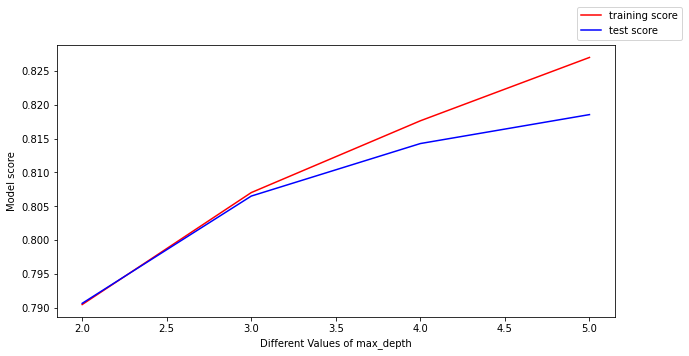

In [ ]:
plt.figure(figsize=(10,5))
plt.xlabel('Different Values of max_depth')
plt.ylabel('Model score')
plt.plot(vals, train_score, color = 'r', label = "training score")
plt.plot(vals, test_score, color = 'b', label = 'test score')
plt.legend(bbox_to_anchor=(1, 1),
           bbox_transform=plt.gcf().transFigure)
plt.show()

In [ ]:
# n_estimators
train_score = []
test_score = []
vals = []

# To check the bias-variance take any parameters and iterate over a few values - Like n_estimator, Max_depth
for k in np.arange(50, 250, 50):
    vals.append(k)
    lg_bv = LGBMClassifier(n_estimators=k, max_depth = 3)
    lg_bv.fit(X_train, y_train)
    
    tr_score = roc_auc_score(y_train, lg_bv.predict_proba(X_train)[:,1])
    train_score.append(tr_score)
    
    te_score = roc_auc_score(y_test, lg_bv.predict_proba(X_test)[:,1])
    test_score.append(te_score)

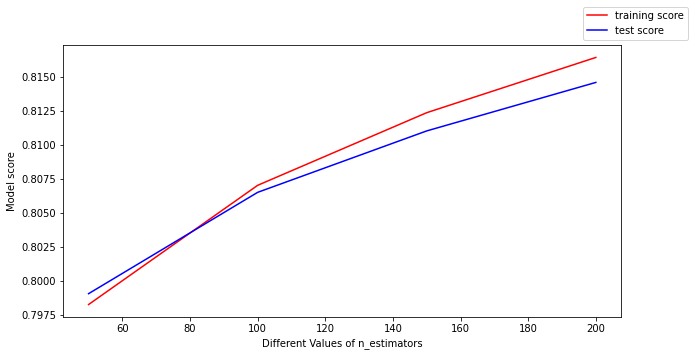

In [ ]:
plt.figure(figsize=(10,5))
plt.xlabel('Different Values of n_estimators')
plt.ylabel('Model score')
plt.plot(vals, train_score, color = 'r', label = "training score")
plt.plot(vals, test_score, color = 'b', label = 'test score')
plt.legend(bbox_to_anchor=(1, 1),
           bbox_transform=plt.gcf().transFigure)
plt.show()

In [ ]:
# learning_rate
train_score = []
test_score = []
vals = []

# To check the bias-variance take any parameters and iterate over a few values - Like n_estimator, Max_depth
for k in np.arange(0.05, 1 ,0.15 ):
    vals.append(k)
    lg_bv = LGBMClassifier(n_estimators=110, learning_rate=k, max_depth = 3)
    lg_bv.fit(X_train, y_train)
    
    tr_score = roc_auc_score(y_train, lg_bv.predict_proba(X_train)[:,1])
    train_score.append(tr_score)
    
    te_score = roc_auc_score(y_test, lg_bv.predict_proba(X_test)[:,1])
    test_score.append(te_score)

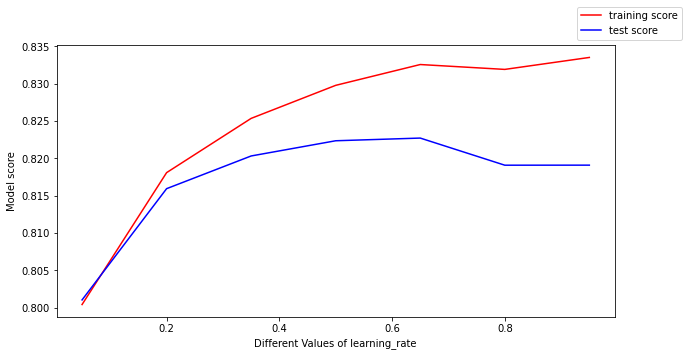

In [ ]:
plt.figure(figsize=(10,5))
plt.xlabel('Different Values of learning_rate')
plt.ylabel('Model score')
plt.plot(vals, train_score, color = 'r', label = "training score")
plt.plot(vals, test_score, color = 'b', label = 'test score')
plt.legend(bbox_to_anchor=(1, 1),
           bbox_transform=plt.gcf().transFigure)
plt.show()

In [ ]:
# min_child_samples
train_score = []
test_score = []
vals = []

# To check the bias-variance take any parameters and iterate over a few values - Like n_estimator, Max_depth
for k in np.arange(10, 50 ,5 ):
    vals.append(k)
    lg_bv = LGBMClassifier(min_child_samples=k, n_estimators=110, learning_rate=0.2, max_depth = 3)
    lg_bv.fit(X_train, y_train)
    
    tr_score = roc_auc_score(y_train, lg_bv.predict_proba(X_train)[:,1])
    train_score.append(tr_score)
    
    te_score = roc_auc_score(y_test, lg_bv.predict_proba(X_test)[:,1])
    test_score.append(te_score)

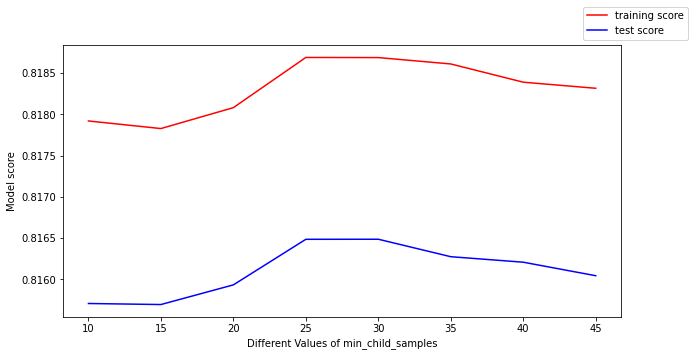

In [ ]:
plt.figure(figsize=(10,5))
plt.xlabel('Different Values of min_child_samples')
plt.ylabel('Model score')
plt.plot(vals, train_score, color = 'r', label = "training score")
plt.plot(vals, test_score, color = 'b', label = 'test score')
plt.legend(bbox_to_anchor=(1, 1),
           bbox_transform=plt.gcf().transFigure)
plt.show()

### LGBM hyperparameter tuning

In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [ ]:
params_lgbm = {'max_depth': [1,2,3,4,5],
               'learning_rate':[0.05,0.1, 0.15,0.175,0.2,0.25,0.3],
               'min_child_samples':[20,25,30,35],
               'n_estimators':[70, 80,90,100,120,140],
              }

In [ ]:
rand_lgbm = RandomizedSearchCV(estimator  = lgbm,
                         param_distributions = params_lgbm,
                         scoring    = 'roc_auc',
                         cv         = 3,
                         n_jobs     = -1,
                         verbose    = True
                        )

In [ ]:
rand_lgbm.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=LGBMClassifier(class_weight='balanced'),
                   n_jobs=-1,
                   param_distributions={'learning_rate': [0.05, 0.1, 0.15,
                                                          0.175, 0.2, 0.25,
                                                          0.3],
                                        'max_depth': [1, 2, 3, 4, 5],
                                        'min_child_samples': [20, 25, 30, 35],
                                        'n_estimators': [70, 80, 90, 100, 120,
                                                         140]},
                   scoring='roc_auc', verbose=True)

In [ ]:
print("Best Hyperparameters: \n", rand_lgbm.best_params_)
print("Best AUC Score: \n", rand_lgbm.best_score_)

Best Hyperparameters: 
 {'n_estimators': 90, 'min_child_samples': 35, 'max_depth': 5, 'learning_rate': 0.3}
Best AUC Score: 
 0.82082967677473


In [ ]:
# Save the best combination of parameters as best model
best_model_lgbm = rand_lgbm.best_estimator_

========================== LGBM Tuned - Model Report =========================
===================== Model Accuracy ==============================
Train Accuracy: 0.717
Test Accuracy: 0.711
===================== Model Performance Metrices ===========================
Test Confusion Matrix: 
[[30734 12848]
 [  770  2720]]
Train Confusion Matrix: 
[[174976  71985]
 [  3594  16166]]
Test Classification Report: 
              precision    recall  f1-score   support

           0       0.98      0.71      0.82     43582
           1       0.17      0.78      0.29      3490

    accuracy                           0.71     47072
   macro avg       0.58      0.74      0.55     47072
weighted avg       0.92      0.71      0.78     47072

Train Classification Report: 
              precision    recall  f1-score   support

           0       0.98      0.71      0.82    246961
           1       0.18      0.82      0.30     19760

    accuracy                           0.72    266721
   macro avg  

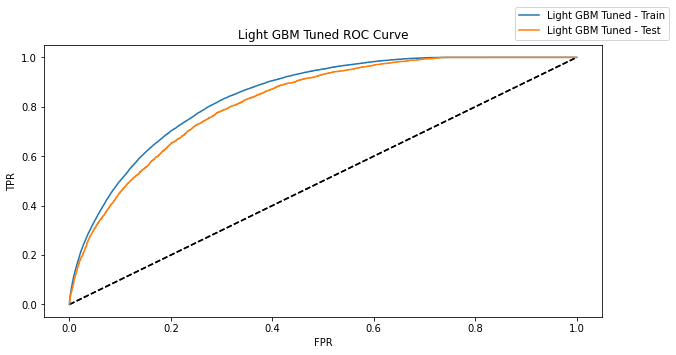

In [ ]:
y_test_pred = best_model_lgbm.predict(X_test)
y_train_pred = best_model_lgbm.predict(X_train)


print("========================== LGBM Tuned - Model Report =========================")

print("===================== Model Accuracy ==============================")
print("Train Accuracy: %0.3f"%(best_model_lgbm.score(X_train, y_train)))
print("Test Accuracy: %0.3f"%(best_model_lgbm.score(X_test, y_test)))
print("=====================================================")

# Performance Metrices
# from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score

print("===================== Model Performance Metrices ===========================")
print("Test Confusion Matrix: ")
print(confusion_matrix(y_test, y_test_pred))
print("============================")
print("Train Confusion Matrix: ")
print(confusion_matrix(y_train, y_train_pred))

print("=====================================================")
print("Test Classification Report: ")
print(classification_report(y_test, y_test_pred))
print("=====================================================")
print("Train Classification Report: ")
print(classification_report(y_train, y_train_pred))

y_test_pred_prob = best_model_lgbm.predict_proba(X_test)[:,1]
y_train_pred_prob = best_model_lgbm.predict_proba(X_train)[:,1]

print("===================== Model AUC Scores ===========================")
print("Train AUC Score: %0.3f"%(roc_auc_score(y_train, y_train_pred_prob)))
print("Test AUC Score: %0.3f"%(roc_auc_score(y_test, y_test_pred_prob)))
print("=====================================================")

print("===================== Model AUC Curve ===========================")
fpr, tpr, threshold = roc_curve(y_test, y_test_pred_prob)
fpr1, tpr1, threshold1 = roc_curve(y_train, y_train_pred_prob)

plt.figure(figsize=(10,5))
plt.title('Light GBM Tuned ROC Curve')
plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr1, tpr1, label='Light GBM Tuned - Train')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(bbox_to_anchor=(1, 1), bbox_transform=plt.gcf().transFigure)

plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr, label='Light GBM Tuned - Test')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(bbox_to_anchor=(1, 1), bbox_transform=plt.gcf().transFigure)
plt.show()

# XGBoost

In [41]:
from xgboost import XGBClassifier

========================== XGBoost - Model Report =========================
===================== Model Accuracy ==============================
Train Accuracy: 0.929
Test Accuracy: 0.926
===================== Cross Validation Scores ===========================
Fold - 1
CV Score = 0.823
Fold - 2
CV Score = 0.824
Fold - 3
CV Score = 0.820
Fold - 4
CV Score = 0.822
Fold - 5
CV Score = 0.822
Average 5-Fold CV Score: 0.822
===================== Model Performance Metrices ===========================
Test Confusion Matrix: 
[[43433   149]
 [ 3311   179]]
Train Confusion Matrix: 
[[246434    527]
 [ 18338   1422]]
Test Classification Report: 
              precision    recall  f1-score   support

           0       0.93      1.00      0.96     43582
           1       0.55      0.05      0.09      3490

    accuracy                           0.93     47072
   macro avg       0.74      0.52      0.53     47072
weighted avg       0.90      0.93      0.90     47072

Train Classification Report: 


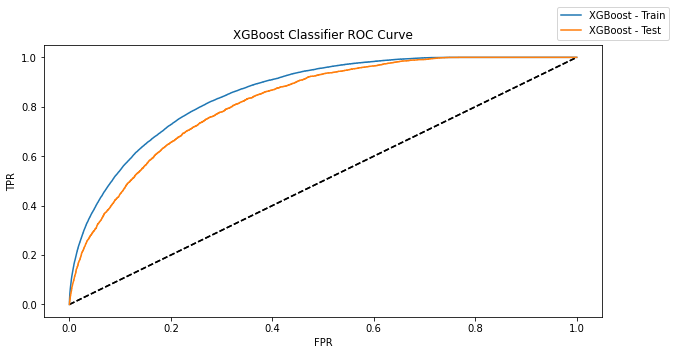

In [42]:
xgb = XGBClassifier()

xgb.fit(X_train, y_train)

y_test_pred = xgb.predict(X_test)
y_train_pred = xgb.predict(X_train)

print("========================== XGBoost - Model Report =========================")

print("===================== Model Accuracy ==============================")
print("Train Accuracy: %0.3f"%(xgb.score(X_train, y_train)))
print("Test Accuracy: %0.3f"%(xgb.score(X_test, y_test)))
print("=====================================================")

# Cross validation
# from sklearn.model_selection import cross_val_score

print("===================== Cross Validation Scores ===========================")
cv_results_xgb = cross_val_score(xgb, X_train, y_train, cv=5, scoring='roc_auc')
for i in range(len(cv_results_xgb)):
    print("Fold - {}".format(i+1))
    print("CV Score = %0.3f"%cv_results_xgb[i])
print("Average 5-Fold CV Score: %0.3f"%(np.mean(cv_results_xgb)))
print("=====================================================")

# Performance Metrices
# from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score

print("===================== Model Performance Metrices ===========================")
print("Test Confusion Matrix: ")
print(confusion_matrix(y_test, y_test_pred))
print("============================")
print("Train Confusion Matrix: ")
print(confusion_matrix(y_train, y_train_pred))

print("=====================================================")
print("Test Classification Report: ")
print(classification_report(y_test, y_test_pred))
print("=====================================================")
print("Train Classification Report: ")
print(classification_report(y_train, y_train_pred))

y_test_pred_prob = xgb.predict_proba(X_test)[:,1]
y_train_pred_prob = xgb.predict_proba(X_train)[:,1]

print("===================== Model AUC Scores ===========================")
print("Train AUC Score: %0.3f"%(roc_auc_score(y_train, y_train_pred_prob)))
print("Test AUC Score: %0.3f"%(roc_auc_score(y_test, y_test_pred_prob)))
print("=====================================================")

print("===================== Model AUC Curve ===========================")
fpr, tpr, threshold = roc_curve(y_test, y_test_pred_prob)
fpr1, tpr1, threshold1 = roc_curve(y_train, y_train_pred_prob)

plt.figure(figsize=(10,5))
plt.title('XGBoost Classifier ROC Curve')
plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr1, tpr1, label='XGBoost - Train')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(bbox_to_anchor=(1, 1), bbox_transform=plt.gcf().transFigure)

plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr, label='XGBoost - Test')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(bbox_to_anchor=(1, 1), bbox_transform=plt.gcf().transFigure)
plt.show()

## Bias-Variance Tradeoff (XGBoost)

In [43]:
# n_estimators
train_score = []
test_score = []
vals = []

# To check the bias-variance take any parameters and iterate over a few values - Like n_estimator, Max_depth
for k in np.arange(20, 100, 10):
    vals.append(k)
    xg_bv = XGBClassifier(n_estimators=k, max_depth = 3)
    xg_bv.fit(X_train, y_train)
    
    tr_score = roc_auc_score(y_train, xg_bv.predict_proba(X_train)[:,1])
    train_score.append(tr_score)
    
    te_score = roc_auc_score(y_test, xg_bv.predict_proba(X_test)[:,1])
    test_score.append(te_score)

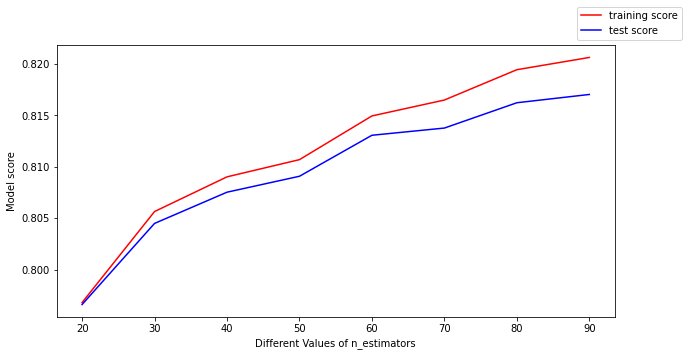

In [44]:
plt.figure(figsize=(10,5))
plt.xlabel('Different Values of n_estimators')
plt.ylabel('Model score')
plt.plot(vals, train_score, color = 'r', label = "training score")
plt.plot(vals, test_score, color = 'b', label = 'test score')
plt.legend(bbox_to_anchor=(1, 1),
           bbox_transform=plt.gcf().transFigure)
plt.show()

In [45]:
# max_depth
train_score = []
test_score = []
vals = []

# To check the bias-variance take any parameters and iterate over a few values - Like n_estimator, Max_depth
for k in np.arange(1, 10, 1):
    vals.append(k)
    xg_bv = XGBClassifier(n_estimators=30, max_depth = k)
    xg_bv.fit(X_train, y_train)
    
    tr_score = roc_auc_score(y_train, xg_bv.predict_proba(X_train)[:,1])
    train_score.append(tr_score)
    
    te_score = roc_auc_score(y_test, xg_bv.predict_proba(X_test)[:,1])
    test_score.append(te_score)

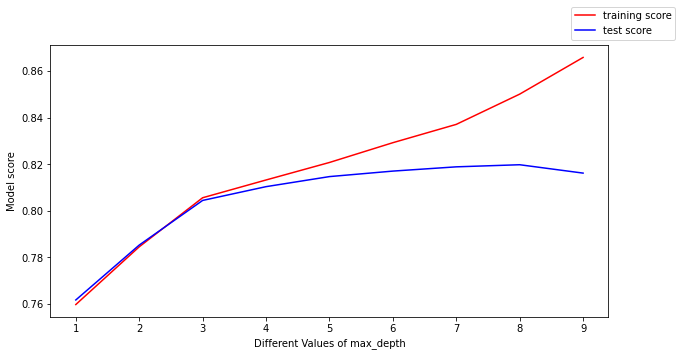

In [46]:
plt.figure(figsize=(10,5))
plt.xlabel('Different Values of max_depth')
plt.ylabel('Model score')
plt.plot(vals, train_score, color = 'r', label = "training score")
plt.plot(vals, test_score, color = 'b', label = 'test score')
plt.legend(bbox_to_anchor=(1, 1),
           bbox_transform=plt.gcf().transFigure)
plt.show()

In [47]:
# learning_rate
train_score = []
test_score = []
vals = []

# To check the bias-variance take any parameters and iterate over a few values - Like n_estimator, Max_depth
for k in np.arange(0.05, 1, 0.05):
    vals.append(k)
    xg_bv = XGBClassifier(n_estimators=40, max_depth = 3, learning_rate=k)
    xg_bv.fit(X_train, y_train)
    
    tr_score = roc_auc_score(y_train, xg_bv.predict_proba(X_train)[:,1])
    train_score.append(tr_score)
    
    te_score = roc_auc_score(y_test, xg_bv.predict_proba(X_test)[:,1])
    test_score.append(te_score)

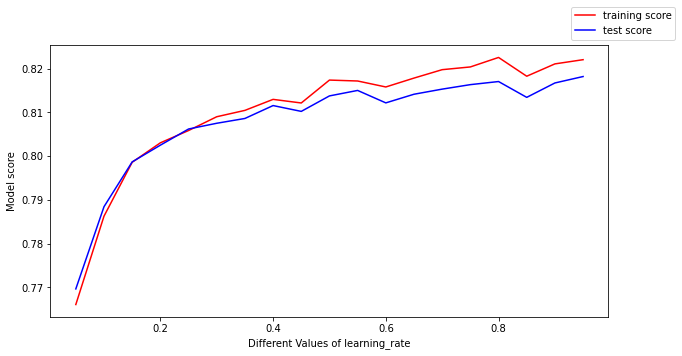

In [48]:
plt.figure(figsize=(10,5))
plt.xlabel('Different Values of learning_rate')
plt.ylabel('Model score')
plt.plot(vals, train_score, color = 'r', label = "training score")
plt.plot(vals, test_score, color = 'b', label = 'test score')
plt.legend(bbox_to_anchor=(1, 1),
           bbox_transform=plt.gcf().transFigure)
plt.show()

In [49]:
# gamma
train_score = []
test_score = []
vals = []

# To check the bias-variance take any parameters and iterate over a few values - Like n_estimator, Max_depth
for k in np.arange(0.05, 1, 0.05):
    vals.append(k)
    xg_bv = XGBClassifier(n_estimators=40, max_depth = 3, learning_rate=0.5, gamma=k)
    xg_bv.fit(X_train, y_train)
    
    tr_score = roc_auc_score(y_train, xg_bv.predict_proba(X_train)[:,1])
    train_score.append(tr_score)
    
    te_score = roc_auc_score(y_test, xg_bv.predict_proba(X_test)[:,1])
    test_score.append(te_score)

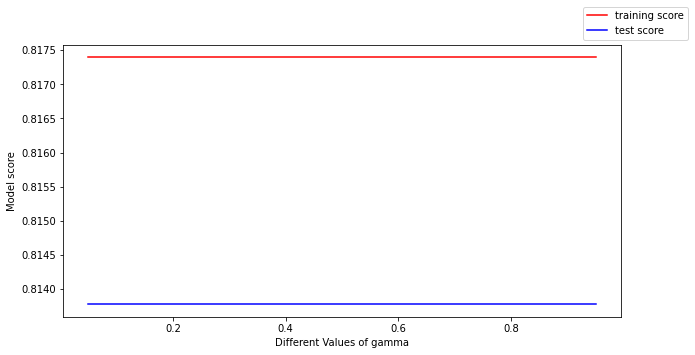

In [50]:
plt.figure(figsize=(10,5))
plt.xlabel('Different Values of gamma')
plt.ylabel('Model score')
plt.plot(vals, train_score, color = 'r', label = "training score")
plt.plot(vals, test_score, color = 'b', label = 'test score')
plt.legend(bbox_to_anchor=(1, 1),
           bbox_transform=plt.gcf().transFigure)
plt.show()

In [51]:
# colsample_bytree
train_score = []
test_score = []
vals = []

# To check the bias-variance take any parameters and iterate over a few values - Like n_estimator, Max_depth
for k in np.arange(0.05, 1, 0.05):
    vals.append(k)
    xg_bv = XGBClassifier(n_estimators=40, max_depth = 3, learning_rate=0.425,colsample_bytree=k)
    xg_bv.fit(X_train, y_train)
    
    tr_score = roc_auc_score(y_train, xg_bv.predict_proba(X_train)[:,1])
    train_score.append(tr_score)
    
    te_score = roc_auc_score(y_test, xg_bv.predict_proba(X_test)[:,1])
    test_score.append(te_score)

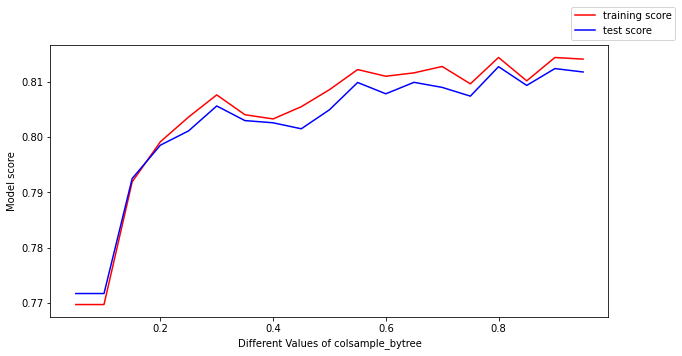

In [52]:
plt.figure(figsize=(10,5))
plt.xlabel('Different Values of colsample_bytree')
plt.ylabel('Model score')
plt.plot(vals, train_score, color = 'r', label = "training score")
plt.plot(vals, test_score, color = 'b', label = 'test score')
plt.legend(bbox_to_anchor=(1, 1),
           bbox_transform=plt.gcf().transFigure)
plt.show()

In [53]:
# min_child_weight
train_score = []
test_score = []
vals = []

# To check the bias-variance take any parameters and iterate over a few values - Like n_estimator, Max_depth
for k in np.arange(1, 7, 1):
    vals.append(k)
    xg_bv = XGBClassifier(n_estimators=40, max_depth = 3, learning_rate=0.5, colsample_bytree=0.8,
                         min_child_weight=k)
    xg_bv.fit(X_train, y_train)
    
    tr_score = roc_auc_score(y_train, xg_bv.predict_proba(X_train)[:,1])
    train_score.append(tr_score)
    
    te_score = roc_auc_score(y_test, xg_bv.predict_proba(X_test)[:,1])
    test_score.append(te_score)

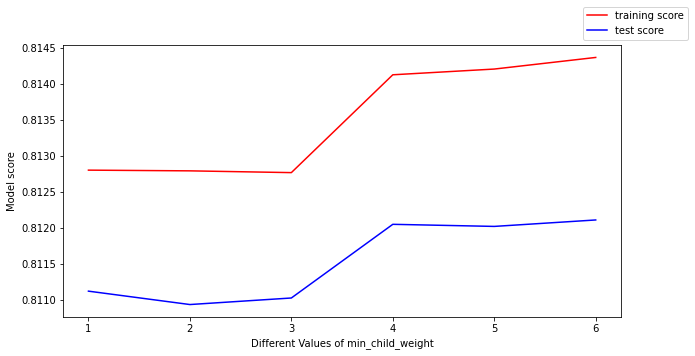

In [54]:
plt.figure(figsize=(10,5))
plt.xlabel('Different Values of min_child_weight')
plt.ylabel('Model score')
plt.plot(vals, train_score, color = 'r', label = "training score")
plt.plot(vals, test_score, color = 'b', label = 'test score')
plt.legend(bbox_to_anchor=(1, 1),
           bbox_transform=plt.gcf().transFigure)
plt.show()

### XGBoost hyperparameter tuning

In [55]:
params_xgb = {'n_estimators' : [20, 40,60, 80, 100], 
             'learning_rate' : [0.1,0.2,0.4,0.6,0.8,1],
             'max_depth' : [1,2,3,4,5,6,8,10],
             'colsample_bytree' : [0.1,0.2,0.4,0.6,0.8,0.9,1],
             'min_child_weight' : [4,5,6]}

In [56]:
rand_xgb = RandomizedSearchCV(estimator  = xgb,
                         param_distributions = params_xgb,
                         scoring    = 'roc_auc',
                         cv         = 3,
                         n_jobs     = -1,
                         verbose    = True
                        )

In [57]:
rand_xgb.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           callbacks=None, colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, gamma=0, gpu_id=-1,
                                           grow_policy='depthwise',
                                           importance_type=None,
                                           interaction_constraints='',
                                           learning_rate=0.300000012,
                                           max_bin=256,...
                                           monotone_constraints='()',
                                           n_estimators=100, n_jobs=0,
                                           num_parallel_tree=1,
                                           predictor='auto', random_state=0,
                                           reg_alpha=0, reg_lambda=1, ...),
                   n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.1, 0.2, 0.4, 0.6,
                                                             0.8, 0.9, 1],
                                        'learning_rate': [0.1, 0.2, 0.4, 0.6,
                                                          0.8, 1],
                                        'max_depth': [1, 2, 3, 4, 5, 6, 8, 10],
                                        'min_child_weight': [4, 5, 6],
                                        'n_estimators': [20, 40, 60, 80, 100]},
                   scoring='roc_auc', verbose=True)

In [58]:
print("Best Hyperparameters: \n", rand_xgb.best_params_)
print("Best AUC Score: \n", rand_xgb.best_score_)

Best Hyperparameters: 
 {'n_estimators': 80, 'min_child_weight': 5, 'max_depth': 3, 'learning_rate': 1, 'colsample_bytree': 0.9}
Best AUC Score: 
 0.8159323949083293


In [59]:
# Save the best combination of parameters as best model
best_model_xgb = rand_xgb.best_estimator_

========================== XGBoost Tuned - Model Report =========================
===================== Model Accuracy ==============================
Train Accuracy: 0.927
Test Accuracy: 0.926
===================== Model Performance Metrices ===========================
Test Confusion Matrix: 
[[43408   174]
 [ 3315   175]]
Train Confusion Matrix: 
[[246133    828]
 [ 18637   1123]]
Test Classification Report: 
              precision    recall  f1-score   support

           0       0.93      1.00      0.96     43582
           1       0.50      0.05      0.09      3490

    accuracy                           0.93     47072
   macro avg       0.72      0.52      0.53     47072
weighted avg       0.90      0.93      0.90     47072

Train Classification Report: 
              precision    recall  f1-score   support

           0       0.93      1.00      0.96    246961
           1       0.58      0.06      0.10     19760

    accuracy                           0.93    266721
   macro av

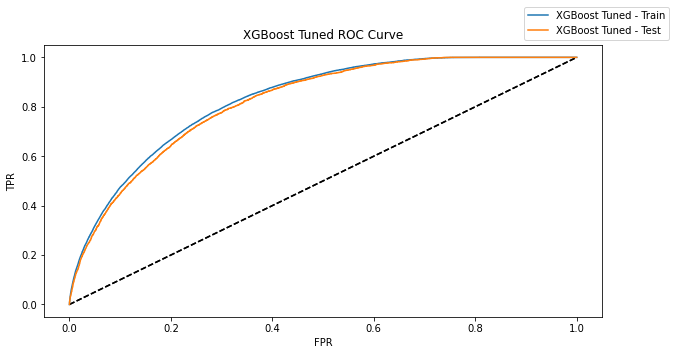

In [60]:
y_test_pred = best_model_xgb.predict(X_test)
y_train_pred = best_model_xgb.predict(X_train)


print("========================== XGBoost Tuned - Model Report =========================")

print("===================== Model Accuracy ==============================")
print("Train Accuracy: %0.3f"%(best_model_xgb.score(X_train, y_train)))
print("Test Accuracy: %0.3f"%(best_model_xgb.score(X_test, y_test)))
print("=====================================================")

# Performance Metrices
# from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score

print("===================== Model Performance Metrices ===========================")
print("Test Confusion Matrix: ")
print(confusion_matrix(y_test, y_test_pred))
print("============================")
print("Train Confusion Matrix: ")
print(confusion_matrix(y_train, y_train_pred))

print("=====================================================")
print("Test Classification Report: ")
print(classification_report(y_test, y_test_pred))
print("=====================================================")
print("Train Classification Report: ")
print(classification_report(y_train, y_train_pred))

y_test_pred_prob = best_model_xgb.predict_proba(X_test)[:,1]
y_train_pred_prob = best_model_xgb.predict_proba(X_train)[:,1]

print("===================== Model AUC Scores ===========================")
print("Train AUC Score: %0.3f"%(roc_auc_score(y_train, y_train_pred_prob)))
print("Test AUC Score: %0.3f"%(roc_auc_score(y_test, y_test_pred_prob)))
print("=====================================================")

print("===================== Model AUC Curve ===========================")
fpr, tpr, threshold = roc_curve(y_test, y_test_pred_prob)
fpr1, tpr1, threshold1 = roc_curve(y_train, y_train_pred_prob)

plt.figure(figsize=(10,5))
plt.title('XGBoost Tuned ROC Curve')
plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr1, tpr1, label='XGBoost Tuned - Train')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(bbox_to_anchor=(1, 1), bbox_transform=plt.gcf().transFigure)

plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr, label='XGBoost Tuned - Test')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(bbox_to_anchor=(1, 1), bbox_transform=plt.gcf().transFigure)
plt.show()

# CatBoost

In [40]:
from catboost import CatBoostClassifier, Pool

Learning rate set to 0.5
0:	learn: 0.4144673	total: 383ms	remaining: 18.8s
1:	learn: 0.3138530	total: 464ms	remaining: 11.1s
2:	learn: 0.2702900	total: 527ms	remaining: 8.25s
3:	learn: 0.2479201	total: 589ms	remaining: 6.78s
4:	learn: 0.2376550	total: 670ms	remaining: 6.03s
5:	learn: 0.2315469	total: 735ms	remaining: 5.39s
6:	learn: 0.2279966	total: 821ms	remaining: 5.04s
7:	learn: 0.2245810	total: 901ms	remaining: 4.73s
8:	learn: 0.2234076	total: 969ms	remaining: 4.41s
9:	learn: 0.2218271	total: 1.04s	remaining: 4.18s
10:	learn: 0.2208543	total: 1.12s	remaining: 3.98s
11:	learn: 0.2201517	total: 1.21s	remaining: 3.83s
12:	learn: 0.2190186	total: 1.28s	remaining: 3.65s
13:	learn: 0.2181775	total: 1.37s	remaining: 3.53s
14:	learn: 0.2177826	total: 1.46s	remaining: 3.41s
15:	learn: 0.2171129	total: 1.55s	remaining: 3.29s
16:	learn: 0.2163702	total: 1.62s	remaining: 3.15s
17:	learn: 0.2159483	total: 1.69s	remaining: 3.01s
18:	learn: 0.2152242	total: 1.77s	remaining: 2.89s
19:	learn: 0.214

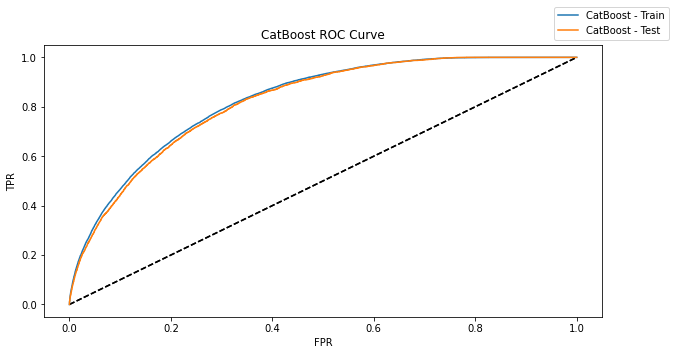

In [41]:
cat = CatBoostClassifier(iterations=50)

cat.fit(X_train, y_train)

y_test_pred = cat.predict(X_test)
y_train_pred = cat.predict(X_train)

print("========================== CatBoost - Model Report =========================")

print("===================== Model Accuracy ==============================")
print("Train Accuracy: %0.3f"%(cat.score(X_train, y_train)))
print("Test Accuracy: %0.3f"%(cat.score(X_test, y_test)))
print("=====================================================")
# Cross validation
from sklearn.model_selection import cross_val_score

print("===================== Cross Validation Scores ===========================")
cv_results_cat = cross_val_score(cat, X_train, y_train, cv=5, scoring='roc_auc')
for i in range(len(cv_results_cat)):
    print("Fold - {}".format(i+1))
    print("CV Score = %0.3f"%cv_results_cat[i])
print("Average 5-Fold CV Score: %0.3f"%(np.mean(cv_results_cat)))
print("=====================================================")

# Performance Metrices
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score

print("===================== Model Performance Metrices ===========================")
print("Test Confusion Matrix: ")
print(confusion_matrix(y_test, y_test_pred))
print("============================")
print("Train Confusion Matrix: ")
print(confusion_matrix(y_train, y_train_pred))

print("=====================================================")
print("Test Classification Report: ")
print(classification_report(y_test, y_test_pred))
print("=====================================================")
print("Train Classification Report: ")
print(classification_report(y_train, y_train_pred))

y_test_pred_prob = cat.predict_proba(X_test)[:,1]
y_train_pred_prob = cat.predict_proba(X_train)[:,1]

print("===================== Model AUC Scores ===========================")
print("Train AUC Score: %0.3f"%(roc_auc_score(y_train, y_train_pred_prob)))
print("Test AUC Score: %0.3f"%(roc_auc_score(y_test, y_test_pred_prob)))
print("=====================================================")

print("===================== Model AUC Curve ===========================")
fpr, tpr, threshold = roc_curve(y_test, y_test_pred_prob)
fpr1, tpr1, threshold1 = roc_curve(y_train, y_train_pred_prob)

plt.figure(figsize=(10,5))
plt.title('CatBoost ROC Curve')
plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr1, tpr1, label='CatBoost - Train')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(bbox_to_anchor=(1, 1), bbox_transform=plt.gcf().transFigure)

plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr, label='CatBoost - Test')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(bbox_to_anchor=(1, 1), bbox_transform=plt.gcf().transFigure)
plt.show()

## Bias-Variance Tradeoff (CatBoost)

In [42]:
train_score = []
test_score = []
vals = []

# To check the bias-variance take any parameters and iterate over a few values - Like n_estimator, Max_depth
for k in np.arange(10, 150, 20):
    vals.append(k)
    cat_bv = CatBoostClassifier(iterations=k)
    cat_bv.fit(X_train, y_train)
    
    tr_score = roc_auc_score(y_train, cat_bv.predict_proba(X_train)[:,1])
    train_score.append(tr_score)
    
    te_score = roc_auc_score(y_test, cat_bv.predict_proba(X_test)[:,1])
    test_score.append(te_score)

Learning rate set to 0.5
0:	learn: 0.4144673	total: 49.5ms	remaining: 446ms
1:	learn: 0.3138530	total: 119ms	remaining: 475ms
2:	learn: 0.2702900	total: 183ms	remaining: 426ms
3:	learn: 0.2479201	total: 252ms	remaining: 378ms
4:	learn: 0.2376550	total: 329ms	remaining: 329ms
5:	learn: 0.2315469	total: 383ms	remaining: 255ms
6:	learn: 0.2279966	total: 441ms	remaining: 189ms
7:	learn: 0.2245810	total: 503ms	remaining: 126ms
8:	learn: 0.2234076	total: 580ms	remaining: 64.4ms
9:	learn: 0.2218271	total: 658ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.4144673	total: 74.1ms	remaining: 2.15s
1:	learn: 0.3138530	total: 140ms	remaining: 1.97s
2:	learn: 0.2702900	total: 214ms	remaining: 1.93s
3:	learn: 0.2479201	total: 278ms	remaining: 1.8s
4:	learn: 0.2376550	total: 347ms	remaining: 1.73s
5:	learn: 0.2315469	total: 408ms	remaining: 1.63s
6:	learn: 0.2279966	total: 481ms	remaining: 1.58s
7:	learn: 0.2245810	total: 572ms	remaining: 1.57s
8:	learn: 0.2234076	total: 641ms	remaining: 1.5s
9

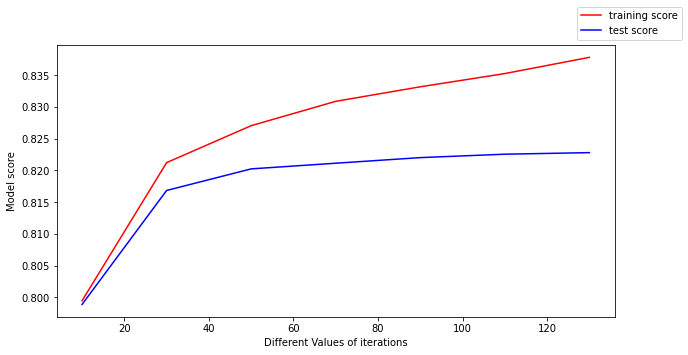

In [43]:
plt.figure(figsize=(10,5))
plt.xlabel('Different Values of iterations')
plt.ylabel('Model score')
plt.plot(vals, train_score, color = 'r', label = "training score")
plt.plot(vals, test_score, color = 'b', label = 'test score')
plt.legend(bbox_to_anchor=(1, 1),
           bbox_transform=plt.gcf().transFigure)
plt.show()

In [44]:
# max_depth
train_score = []
test_score = []
vals = []

# To check the bias-variance take any parameters and iterate over a few values - Like n_estimator, Max_depth
for k in np.arange(1, 10, 1):
    vals.append(k)
    cat_bv = CatBoostClassifier(iterations=40, max_depth=k)
    cat_bv.fit(X_train, y_train)
    
    tr_score = roc_auc_score(y_train, cat_bv.predict_proba(X_train)[:,1])
    train_score.append(tr_score)
    
    te_score = roc_auc_score(y_test, cat_bv.predict_proba(X_test)[:,1])
    test_score.append(te_score)

Learning rate set to 0.5
0:	learn: 0.4184509	total: 20.9ms	remaining: 815ms
1:	learn: 0.3230829	total: 49.8ms	remaining: 946ms
2:	learn: 0.2821781	total: 79.3ms	remaining: 978ms
3:	learn: 0.2631141	total: 102ms	remaining: 919ms
4:	learn: 0.2544400	total: 128ms	remaining: 895ms
5:	learn: 0.2494924	total: 154ms	remaining: 874ms
6:	learn: 0.2470084	total: 182ms	remaining: 857ms
7:	learn: 0.2439512	total: 214ms	remaining: 854ms
8:	learn: 0.2423944	total: 253ms	remaining: 870ms
9:	learn: 0.2406949	total: 282ms	remaining: 847ms
10:	learn: 0.2396567	total: 315ms	remaining: 831ms
11:	learn: 0.2388482	total: 348ms	remaining: 811ms
12:	learn: 0.2382580	total: 384ms	remaining: 798ms
13:	learn: 0.2377814	total: 421ms	remaining: 782ms
14:	learn: 0.2364036	total: 453ms	remaining: 755ms
15:	learn: 0.2357643	total: 487ms	remaining: 730ms
16:	learn: 0.2352594	total: 528ms	remaining: 715ms
17:	learn: 0.2348297	total: 563ms	remaining: 688ms
18:	learn: 0.2344652	total: 605ms	remaining: 668ms
19:	learn: 0.

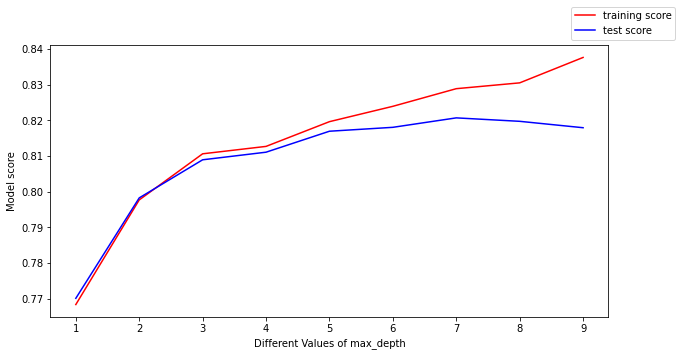

In [45]:
plt.figure(figsize=(10,5))
plt.xlabel('Different Values of max_depth')
plt.ylabel('Model score')
plt.plot(vals, train_score, color = 'r', label = "training score")
plt.plot(vals, test_score, color = 'b', label = 'test score')
plt.legend(bbox_to_anchor=(1, 1),
           bbox_transform=plt.gcf().transFigure)
plt.show()

In [46]:
# learning_rate
train_score = []
test_score = []
vals = []

# To check the bias-variance take any parameters and iterate over a few values - Like n_estimator, Max_depth
for k in np.arange(0.05, 1, 0.05):
    vals.append(k)
    cat_bv = CatBoostClassifier(iterations=40, max_depth=5,learning_rate=k)
    cat_bv.fit(X_train, y_train)
    
    tr_score = roc_auc_score(y_train, cat_bv.predict_proba(X_train)[:,1])
    train_score.append(tr_score)
    
    te_score = roc_auc_score(y_test, cat_bv.predict_proba(X_test)[:,1])
    test_score.append(te_score)

0:	learn: 0.6572213	total: 79.4ms	remaining: 3.1s
1:	learn: 0.6246704	total: 154ms	remaining: 2.92s
2:	learn: 0.5950475	total: 218ms	remaining: 2.69s
3:	learn: 0.5680047	total: 351ms	remaining: 3.16s
4:	learn: 0.5432526	total: 516ms	remaining: 3.61s
5:	learn: 0.5207365	total: 613ms	remaining: 3.48s
6:	learn: 0.5001442	total: 683ms	remaining: 3.22s
7:	learn: 0.4809724	total: 753ms	remaining: 3.01s
8:	learn: 0.4634247	total: 805ms	remaining: 2.77s
9:	learn: 0.4474977	total: 879ms	remaining: 2.64s
10:	learn: 0.4325720	total: 963ms	remaining: 2.54s
11:	learn: 0.4187583	total: 1.05s	remaining: 2.44s
12:	learn: 0.4058214	total: 1.11s	remaining: 2.31s
13:	learn: 0.3938425	total: 1.2s	remaining: 2.23s
14:	learn: 0.3827698	total: 1.26s	remaining: 2.11s
15:	learn: 0.3723723	total: 1.34s	remaining: 2.01s
16:	learn: 0.3627843	total: 1.42s	remaining: 1.92s
17:	learn: 0.3539051	total: 1.71s	remaining: 2.09s
18:	learn: 0.3456578	total: 1.84s	remaining: 2.03s
19:	learn: 0.3379742	total: 1.93s	remainin

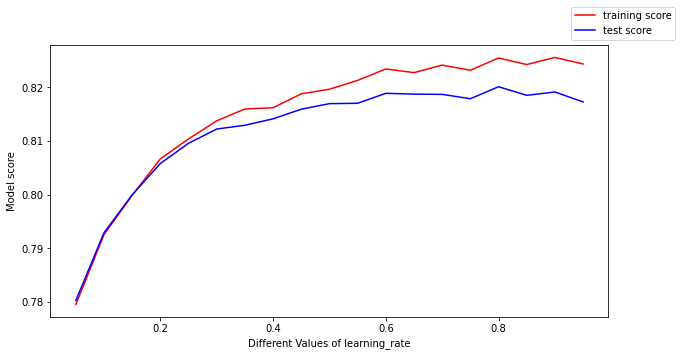

In [47]:
plt.figure(figsize=(10,5))
plt.xlabel('Different Values of learning_rate')
plt.ylabel('Model score')
plt.plot(vals, train_score, color = 'r', label = "training score")
plt.plot(vals, test_score, color = 'b', label = 'test score')
plt.legend(bbox_to_anchor=(1, 1),
           bbox_transform=plt.gcf().transFigure)
plt.show()

In [48]:
# border_count
train_score = []
test_score = []
vals = []

# To check the bias-variance take any parameters and iterate over a few values - Like n_estimator, Max_depth
for k in np.arange(10, 150, 10):
    vals.append(k)
    cat_bv = CatBoostClassifier(iterations=40, max_depth=5,learning_rate=0.45, border_count=k)
    cat_bv.fit(X_train, y_train)
    
    tr_score = roc_auc_score(y_train, cat_bv.predict_proba(X_train)[:,1])
    train_score.append(tr_score)
    
    te_score = roc_auc_score(y_test, cat_bv.predict_proba(X_test)[:,1])
    test_score.append(te_score)

0:	learn: 0.4326279	total: 26.4ms	remaining: 1.03s
1:	learn: 0.3311900	total: 54ms	remaining: 1.02s
2:	learn: 0.2823106	total: 81.4ms	remaining: 1s
3:	learn: 0.2563774	total: 110ms	remaining: 994ms
4:	learn: 0.2427278	total: 137ms	remaining: 961ms
5:	learn: 0.2357022	total: 168ms	remaining: 950ms
6:	learn: 0.2306503	total: 198ms	remaining: 934ms
7:	learn: 0.2279925	total: 227ms	remaining: 907ms
8:	learn: 0.2264978	total: 259ms	remaining: 892ms
9:	learn: 0.2257398	total: 292ms	remaining: 877ms
10:	learn: 0.2241196	total: 325ms	remaining: 856ms
11:	learn: 0.2233918	total: 355ms	remaining: 828ms
12:	learn: 0.2220135	total: 387ms	remaining: 803ms
13:	learn: 0.2216404	total: 416ms	remaining: 773ms
14:	learn: 0.2207730	total: 447ms	remaining: 746ms
15:	learn: 0.2199019	total: 482ms	remaining: 723ms
16:	learn: 0.2196283	total: 519ms	remaining: 702ms
17:	learn: 0.2194023	total: 548ms	remaining: 670ms
18:	learn: 0.2189792	total: 577ms	remaining: 637ms
19:	learn: 0.2182757	total: 611ms	remaining

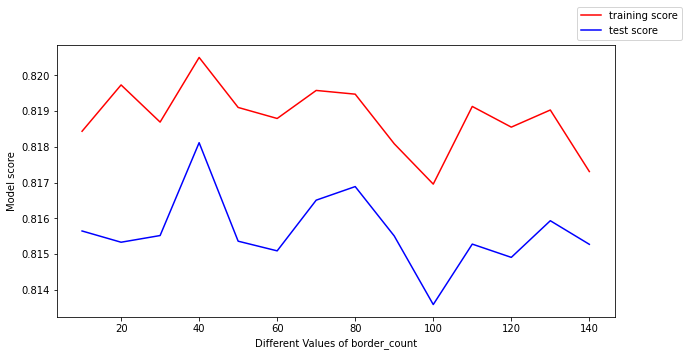

In [49]:
plt.figure(figsize=(10,5))
plt.xlabel('Different Values of border_count')
plt.ylabel('Model score')
plt.plot(vals, train_score, color = 'r', label = "training score")
plt.plot(vals, test_score, color = 'b', label = 'test score')
plt.legend(bbox_to_anchor=(1, 1),
           bbox_transform=plt.gcf().transFigure)
plt.show()

## CatBoost hyperparameter tuning

In [50]:
params_cat = {'iterations' : [20, 30, 40, 50,60, 80, 100], 
             'learning_rate' : [0.15,0.2,0.25,0.3,0.4,0.45,0.5,0.6,0.8],
              'border_count' : [40,60,80,120,130],
             'max_depth' : [1,2,3,4,5,6,7]
             }

In [51]:
rand_cat = RandomizedSearchCV(estimator  = cat,
                         param_distributions = params_cat,
                         scoring    = 'roc_auc',
                         cv         = 3,
                         n_jobs     = -1,
                         verbose    = True
                        )

In [52]:
rand_cat.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
0:	learn: 0.3784596	total: 51.7ms	remaining: 4.08s
1:	learn: 0.2882977	total: 105ms	remaining: 4.1s
2:	learn: 0.2539753	total: 155ms	remaining: 3.97s
3:	learn: 0.2410848	total: 213ms	remaining: 4.05s
4:	learn: 0.2327749	total: 276ms	remaining: 4.15s
5:	learn: 0.2284197	total: 349ms	remaining: 4.31s
6:	learn: 0.2252787	total: 419ms	remaining: 4.37s
7:	learn: 0.2241408	total: 481ms	remaining: 4.32s
8:	learn: 0.2231867	total: 551ms	remaining: 4.35s
9:	learn: 0.2216171	total: 621ms	remaining: 4.35s
10:	learn: 0.2210630	total: 682ms	remaining: 4.28s
11:	learn: 0.2198792	total: 794ms	remaining: 4.5s
12:	learn: 0.2188992	total: 911ms	remaining: 4.69s
13:	learn: 0.2186030	total: 962ms	remaining: 4.53s
14:	learn: 0.2182625	total: 1.03s	remaining: 4.46s
15:	learn: 0.2177630	total: 1.11s	remaining: 4.45s
16:	learn: 0.2174921	total: 1.18s	remaining: 4.37s
17:	learn: 0.2172701	total: 1.25s	remaining: 4.3s
18:	learn: 0.2171122	total: 1.32s

RandomizedSearchCV(cv=3,
                   estimator=<catboost.core.CatBoostClassifier object at 0x0000018480E8F190>,
                   n_jobs=-1,
                   param_distributions={'border_count': [40, 60, 80, 120, 130],
                                        'iterations': [20, 30, 40, 50, 60, 80,
                                                       100],
                                        'learning_rate': [0.15, 0.2, 0.25, 0.3,
                                                          0.4, 0.45, 0.5, 0.6,
                                                          0.8],
                                        'max_depth': [1, 2, 3, 4, 5, 6, 7]},
                   scoring='roc_auc', verbose=True)

In [53]:
print("Best Hyperparameters: \n", rand_cat.best_params_)
print("Best AUC Score: \n", rand_cat.best_score_)

Best Hyperparameters: 
 {'max_depth': 5, 'learning_rate': 0.6, 'iterations': 80, 'border_count': 120}
Best AUC Score: 
 0.8194696718197618


In [54]:
# Save the best combination of parameters as best model
best_model_cat = rand_cat.best_estimator_

========================== CatBoost Tuned - Model Report =========================
===================== Model Accuracy ==============================
Train Accuracy: 0.927
Test Accuracy: 0.926
===================== Model Performance Metrices ===========================
Test Confusion Matrix: 
[[43464   118]
 [ 3356   134]]
Train Confusion Matrix: 
[[246408    553]
 [ 18878    882]]
Test Classification Report: 
              precision    recall  f1-score   support

           0       0.93      1.00      0.96     43582
           1       0.53      0.04      0.07      3490

    accuracy                           0.93     47072
   macro avg       0.73      0.52      0.52     47072
weighted avg       0.90      0.93      0.90     47072

Train Classification Report: 
              precision    recall  f1-score   support

           0       0.93      1.00      0.96    246961
           1       0.61      0.04      0.08     19760

    accuracy                           0.93    266721
   macro a

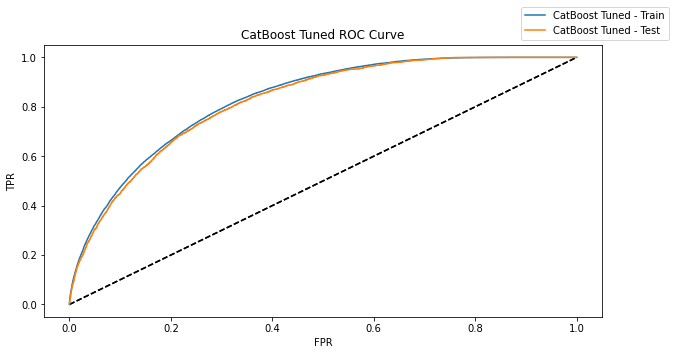

In [55]:
y_test_pred = best_model_cat.predict(X_test)
y_train_pred = best_model_cat.predict(X_train)


print("========================== CatBoost Tuned - Model Report =========================")

print("===================== Model Accuracy ==============================")
print("Train Accuracy: %0.3f"%(best_model_cat.score(X_train, y_train)))
print("Test Accuracy: %0.3f"%(best_model_cat.score(X_test, y_test)))
print("=====================================================")

# Performance Metrices
# from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score

print("===================== Model Performance Metrices ===========================")
print("Test Confusion Matrix: ")
print(confusion_matrix(y_test, y_test_pred))
print("============================")
print("Train Confusion Matrix: ")
print(confusion_matrix(y_train, y_train_pred))

print("=====================================================")
print("Test Classification Report: ")
print(classification_report(y_test, y_test_pred))
print("=====================================================")
print("Train Classification Report: ")
print(classification_report(y_train, y_train_pred))

y_test_pred_prob = best_model_cat.predict_proba(X_test)[:,1]
y_train_pred_prob = best_model_cat.predict_proba(X_train)[:,1]

print("===================== Model AUC Scores ===========================")
print("Train AUC Score: %0.3f"%(roc_auc_score(y_train, y_train_pred_prob)))
print("Test AUC Score: %0.3f"%(roc_auc_score(y_test, y_test_pred_prob)))
print("=====================================================")

print("===================== Model AUC Curve ===========================")
fpr, tpr, threshold = roc_curve(y_test, y_test_pred_prob)
fpr1, tpr1, threshold1 = roc_curve(y_train, y_train_pred_prob)

plt.figure(figsize=(10,5))
plt.title('CatBoost Tuned ROC Curve')
plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr1, tpr1, label='CatBoost Tuned - Train')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(bbox_to_anchor=(1, 1), bbox_transform=plt.gcf().transFigure)

plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr, label='CatBoost Tuned - Test')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(bbox_to_anchor=(1, 1), bbox_transform=plt.gcf().transFigure)
plt.show()

# Model Scoring & Business KPIs

In [56]:
best_model = rand_cat.best_estimator_

### Saving the best model

In [57]:
import pickle

In [58]:
with open('cat_boost_pkl_1', 'wb') as files:
    pickle.dump(best_model, files)

In [59]:
# load saved model
with open('cat_boost_pkl_1' , 'rb') as f:
   cat_b = pickle.load(f)

## Recreating the same results with same data

========================== Light GBM Tuned - Model Report =========================
===================== Model Accuracy ==============================
Train Accuracy: 0.927
Test Accuracy: 0.926
===================== Model Performance Metrices ===========================
Test Confusion Matrix: 
[[43464   118]
 [ 3356   134]]
Train Confusion Matrix: 
[[246408    553]
 [ 18878    882]]
Test Classification Report: 
              precision    recall  f1-score   support

           0       0.93      1.00      0.96     43582
           1       0.53      0.04      0.07      3490

    accuracy                           0.93     47072
   macro avg       0.73      0.52      0.52     47072
weighted avg       0.90      0.93      0.90     47072

Train Classification Report: 
              precision    recall  f1-score   support

           0       0.93      1.00      0.96    246961
           1       0.61      0.04      0.08     19760

    accuracy                           0.93    266721
   macro 

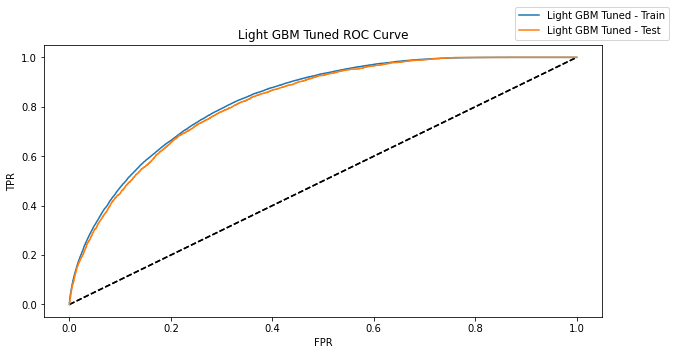

In [60]:
y_test_pred = cat_b.predict(X_test)
y_train_pred = cat_b.predict(X_train)


print("========================== Light GBM Tuned - Model Report =========================")

print("===================== Model Accuracy ==============================")
print("Train Accuracy: %0.3f"%(cat_b.score(X_train, y_train)))
print("Test Accuracy: %0.3f"%(cat_b.score(X_test, y_test)))
print("=====================================================")

# Performance Metrices
# from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score

print("===================== Model Performance Metrices ===========================")
print("Test Confusion Matrix: ")
print(confusion_matrix(y_test, y_test_pred))
print("============================")
print("Train Confusion Matrix: ")
print(confusion_matrix(y_train, y_train_pred))

print("=====================================================")
print("Test Classification Report: ")
print(classification_report(y_test, y_test_pred))
print("=====================================================")
print("Train Classification Report: ")
print(classification_report(y_train, y_train_pred))

y_test_pred_prob = cat_b.predict_proba(X_test)[:,1]
y_train_pred_prob = cat_b.predict_proba(X_train)[:,1]

print("===================== Model AUC Scores ===========================")
print("Train AUC Score: %0.3f"%(roc_auc_score(y_train, y_train_pred_prob)))
print("Test AUC Score: %0.3f"%(roc_auc_score(y_test, y_test_pred_prob)))
print("=====================================================")
print("===================== Model AUC Curve ===========================")
fpr, tpr, threshold = roc_curve(y_test, y_test_pred_prob)
fpr1, tpr1, threshold1 = roc_curve(y_train, y_train_pred_prob)

plt.figure(figsize=(10,5))
plt.title('Light GBM Tuned ROC Curve')
plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr1, tpr1, label='Light GBM Tuned - Train')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(bbox_to_anchor=(1, 1), bbox_transform=plt.gcf().transFigure)

plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr, label='Light GBM Tuned - Test')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(bbox_to_anchor=(1, 1), bbox_transform=plt.gcf().transFigure)
plt.show()

# Step 5: Model Scoring & Business KPIs
### We will score the model with Validation Data
- Get the Validation data and create only those features that were used in the model (Top_Feat)
- Perform all the pre-processing steps like imputation, scaling etc using numbers from development sample
- Score the model and report the Performance KPIs

In [61]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', 200)

import scorecardpy as sc
import pickle
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score

# load saved model
with open('cat_boost_pkl_1' , 'rb') as f:
    cat_b = pickle.load(f)



In [62]:
score_data_1 =pd.read_csv("C:/Users/RAJKUMAR/Downloads/validation_final.csv")

## Model Scoing

========================== Model Validation Report =========================
================================= Accuracy =================================
Validation Accuracy: 0.926
===================== Model Validation Performance Metrices ================
Validation Confusion Matrix: 
[[43464   118]
 [ 3356   134]]
Validation Classification Report: 
              precision    recall  f1-score   support

           0       0.93      1.00      0.96     43582
           1       0.53      0.04      0.07      3490

    accuracy                           0.93     47072
   macro avg       0.73      0.52      0.52     47072
weighted avg       0.90      0.93      0.90     47072

===================== Model Validation AUC Scores ==========================
Validation AUC Score: 0.821
===================== Model Validation AUC Curve ===========================


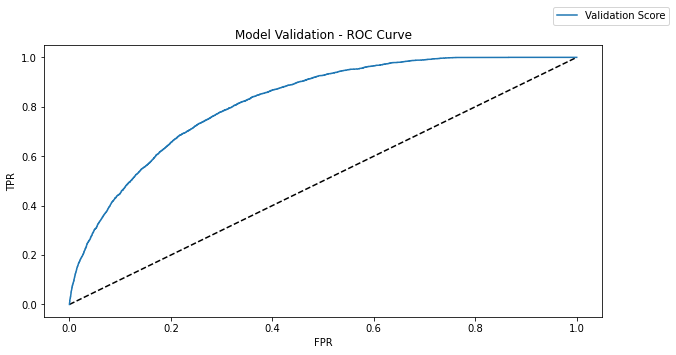

In [63]:
y_val_pred = cat_b.predict(score_data_1)
y_val_pred_prob = cat_b.predict_proba(score_data_1)[:,1]

val_accuracy = cat_b.score(score_data_1, score_data_1['Stay'])
auc_score = roc_auc_score(score_data_1['Stay'], y_val_pred_prob)


print("========================== Model Validation Report =========================")

print("================================= Accuracy =================================")
print("Validation Accuracy: %0.3f"%val_accuracy)
print("============================================================================")

# Performance Metrices
# from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score

print("===================== Model Validation Performance Metrices ================")
print("Validation Confusion Matrix: ")
print(confusion_matrix(score_data_1['Stay'], y_val_pred))
print("============================================================================")

print("Validation Classification Report: ")
print(classification_report(score_data_1['Stay'], y_val_pred))
print("============================================================================")


print("===================== Model Validation AUC Scores ==========================")
print("Validation AUC Score: %0.3f"%auc_score)
print("============================================================================")

print("===================== Model Validation AUC Curve ===========================")
fpr, tpr, threshold = roc_curve(score_data_1['Stay'], y_val_pred_prob)

plt.figure(figsize=(10,5))
plt.title('Model Validation - ROC Curve')
plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr, label='Validation Score')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(bbox_to_anchor=(1, 1), bbox_transform=plt.gcf().transFigure)

plt.show()